# Training different models

## Read data

In [97]:
import os
import re
import pandas as pd
import numpy as np
import random
import sklearn

In [87]:
TRAIN_DIR = "./data/training/"
TRAIN_SUFFIX = "-train.txt"

DEV_DIR = "./data/development/"
DEV_SUFFIX = "-dev.txt"

TEST_DIR = "./data/test-gold/"
TEST_SUFFIX = "-test-gold.txt"

YEAR_PREFIX = "2018-"
FILE_PREFIX = "EI-oc-En-"

EMOTIONS = ["anger", "fear", "joy", "sadness"] 
LABEL_EMOTIONS = {i: emo for i, emo in enumerate(EMOTIONS)}
EMOTIONS_LABEL = {emo: i for i, emo in enumerate(EMOTIONS)}

In [22]:
TRAIN_FILES = []
DEV_FILES = []
TEST_FILES = []

for emo in EMOTIONS: 
    TRAIN_FILES += [TRAIN_DIR + FILE_PREFIX + emo + TRAIN_SUFFIX]
    DEV_FILES += [DEV_DIR + YEAR_PREFIX + FILE_PREFIX + emo + DEV_SUFFIX]
    TEST_FILES += [TEST_DIR + YEAR_PREFIX + FILE_PREFIX + emo + TEST_SUFFIX]

for file in TRAIN_FILES + DEV_FILES + TEST_FILES:
    print(file, os.path.exists(file))

./data/training/EI-oc-En-anger-train.txt True
./data/training/EI-oc-En-fear-train.txt True
./data/training/EI-oc-En-joy-train.txt True
./data/training/EI-oc-En-sadness-train.txt True
./data/development/2018-EI-oc-En-anger-dev.txt True
./data/development/2018-EI-oc-En-fear-dev.txt True
./data/development/2018-EI-oc-En-joy-dev.txt True
./data/development/2018-EI-oc-En-sadness-dev.txt True
./data/test-gold/2018-EI-oc-En-anger-test-gold.txt True
./data/test-gold/2018-EI-oc-En-fear-test-gold.txt True
./data/test-gold/2018-EI-oc-En-joy-test-gold.txt True
./data/test-gold/2018-EI-oc-En-sadness-test-gold.txt True


In [88]:
TRAIN_DATA = pd.concat(pd.read_csv(f, sep='\t') for f in TRAIN_FILES)
TRAIN_DATA = sklearn.utils.shuffle(TRAIN_DATA)
TRAIN_DATA        

ID                                              Tweet  \
101   2017-En-40179  Even a pencil✏ never #stayed  with me until it...   
1787  2017-En-20428  @stevie7t Why does talksport sound like it's b...   
1589  2017-En-20617  Recording some more #FNAF and had to FaceTime ...   
1427  2017-En-20518  Hope was an instinct only the reasoning human ...   
1462  2017-En-31411  Your attitude toward your struggles is equally...   
...             ...                                                ...   
166   2017-En-10282  and apparently he's supposed to have a Scottis...   
145   2017-En-30994  @WHUFC_HUB @westhamtransfer @TheHammers_ I don...   
689   2017-En-10664  “He who is slow to anger is better than the mi...   
682   2017-En-22160  one ep of despair arc made me happy but and th...   
1482  2017-En-20429  I'm afraid she's the goat you libeling people?...   

     Affect Dimension                                Intensity Class  
101           sadness  2: moderate amount of sadness can be inferred  
1787             fear                     0: no fear can be inferred  
1589             fear                     0: no fear can be inferred  
1427             fear                     0: no fear can be inferred  
1462              joy                      0: no joy can be inferred  
...               ...                                            ...  
166             anger    2: moderate amount of anger can be inferred  
145               joy                      0: no joy can be inferred  
689             anger                    0: no anger can be inferred  
682           sadness      3: high amount of sadness can be inferred  
1482             fear                     0: no fear can be inferred  

[7102 rows x 4 columns]

In [91]:
TRAIN_DATA["Category"] = TRAIN_DATA["Affect Dimension"]
TRAIN_DATA["Label"] = TRAIN_DATA["Affect Dimension"].apply(lambda x: EMOTIONS_LABEL[x])
TRAIN_DATA["Intensity"] = TRAIN_DATA["Intensity Class"].apply(lambda x: int(x[0]))
TRAIN_DATA

ID                                              Tweet  \
101   2017-En-40179  Even a pencil✏ never #stayed  with me until it...   
1787  2017-En-20428  @stevie7t Why does talksport sound like it's b...   
1589  2017-En-20617  Recording some more #FNAF and had to FaceTime ...   
1427  2017-En-20518  Hope was an instinct only the reasoning human ...   
1462  2017-En-31411  Your attitude toward your struggles is equally...   
...             ...                                                ...   
166   2017-En-10282  and apparently he's supposed to have a Scottis...   
145   2017-En-30994  @WHUFC_HUB @westhamtransfer @TheHammers_ I don...   
689   2017-En-10664  “He who is slow to anger is better than the mi...   
682   2017-En-22160  one ep of despair arc made me happy but and th...   
1482  2017-En-20429  I'm afraid she's the goat you libeling people?...   

     Affect Dimension                                Intensity Class Category  \
101           sadness  2: moderate amount of sadness can be inferred  sadness   
1787             fear                     0: no fear can be inferred     fear   
1589             fear                     0: no fear can be inferred     fear   
1427             fear                     0: no fear can be inferred     fear   
1462              joy                      0: no joy can be inferred      joy   
...               ...                                            ...      ...   
166             anger    2: moderate amount of anger can be inferred    anger   
145               joy                      0: no joy can be inferred      joy   
689             anger                    0: no anger can be inferred    anger   
682           sadness      3: high amount of sadness can be inferred  sadness   
1482             fear                     0: no fear can be inferred     fear   

      Label  Intensity  
101       3          2  
1787      1          0  
1589      1          0  
1427      1          0  
1462      2          0  
...     ...        ...  
166       0          2  
145       2          0  
689       0          0  
682       3          3  
1482      1          0  

[7102 rows x 7 columns]

In [94]:
TRAIN_DATA["Category"].value_counts()

fear       2252
anger      1701
joy        1616
sadness    1533
Name: Category, dtype: int64

In [83]:
DEV_DATA = pd.concat(pd.read_csv(f, sep='\t') for f in DEV_FILES)
DEV_DATA = sklearn.utils.shuffle(DEV_DATA)
DEV_DATA

ID                                              Tweet  \
233  2018-En-01932  Happy Birthday to #Olympic #great and #champ @...   
331  2018-En-02484  The same part of roof bar (driver's side) are ...   
59   2018-En-02934  Are u #depressed #hypo #manic #lonely #bored #...   
126  2018-En-01533    @stolencarRSA What's the make so we can panic 😃   
252  2018-En-02646  Beware the wrath of an angry, frustrated, #agi...   
..             ...                                                ...   
186  2018-En-03805  @Ben_Ripley42 I dont know but you seem to have...   
57   2018-En-03237  was one moron  driving his oversize tonka truc...   
214  2018-En-04370  WAIT...Lawrence's friend dragged the fuck outt...   
114  2018-En-03249  Israel's recent overtures towards West Africa ...   
100  2018-En-03891  “#Woe unto #you that are #full! for ye shall #...   

    Affect Dimension                             Intensity Class  
233              joy   2: moderate amount of joy can be inferred  
331             fear  2: moderate amount of fear can be inferred  
59           sadness    1: low amount of sadness can be inferred  
126              joy                   0: no joy can be inferred  
252          sadness    1: low amount of sadness can be inferred  
..               ...                                         ...  
186            anger      1: low amount of anger can be inferred  
57              fear                  0: no fear can be inferred  
214             fear                  0: no fear can be inferred  
114             fear                  0: no fear can be inferred  
100          sadness               0: no sadness can be inferred  

[1464 rows x 4 columns]

In [92]:
DEV_DATA["Category"] = DEV_DATA["Affect Dimension"]
DEV_DATA["Label"] = DEV_DATA["Affect Dimension"].apply(lambda x: EMOTIONS_LABEL[x])
DEV_DATA["Intensity"] = DEV_DATA["Intensity Class"].apply(lambda x: int(x[0]))
DEV_DATA

ID                                              Tweet  \
233  2018-En-01932  Happy Birthday to #Olympic #great and #champ @...   
331  2018-En-02484  The same part of roof bar (driver's side) are ...   
59   2018-En-02934  Are u #depressed #hypo #manic #lonely #bored #...   
126  2018-En-01533    @stolencarRSA What's the make so we can panic 😃   
252  2018-En-02646  Beware the wrath of an angry, frustrated, #agi...   
..             ...                                                ...   
186  2018-En-03805  @Ben_Ripley42 I dont know but you seem to have...   
57   2018-En-03237  was one moron  driving his oversize tonka truc...   
214  2018-En-04370  WAIT...Lawrence's friend dragged the fuck outt...   
114  2018-En-03249  Israel's recent overtures towards West Africa ...   
100  2018-En-03891  “#Woe unto #you that are #full! for ye shall #...   

    Affect Dimension                             Intensity Class Category  \
233              joy   2: moderate amount of joy can be inferred      joy   
331             fear  2: moderate amount of fear can be inferred     fear   
59           sadness    1: low amount of sadness can be inferred  sadness   
126              joy                   0: no joy can be inferred      joy   
252          sadness    1: low amount of sadness can be inferred  sadness   
..               ...                                         ...      ...   
186            anger      1: low amount of anger can be inferred    anger   
57              fear                  0: no fear can be inferred     fear   
214             fear                  0: no fear can be inferred     fear   
114             fear                  0: no fear can be inferred     fear   
100          sadness               0: no sadness can be inferred  sadness   

     Label  Intensity  
233      2          2  
331      1          2  
59       3          1  
126      2          0  
252      3          1  
..     ...        ...  
186      0          1  
57       1          0  
214      1          0  
114      1          0  
100      3          0  

[1464 rows x 7 columns]

In [93]:
DEV_DATA["Affect Dimension"].value_counts()

sadness    397
fear       389
anger      388
joy        290
Name: Affect Dimension, dtype: int64

## Tweet cleaning

In [162]:
import emoji
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords

stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [163]:
def decode_emoji(text):
    return emoji.demojize(text)

def decode_HTML(text):
    return BeautifulSoup(text, 'lxml').get_text()

def remove_mention(text):
    return re.sub(r'@[A-Za-z0-9]+', '', text)
    
def remove_URL(text):
    return re.sub(r"http\S+", "", text)

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', ' ', text)

def to_lowercase(text):
    return ' '.join([w.lower() for w in text.split()])
 
def lemmatize_stemming(text):
    return ' '.join([stemmer.stem(lemmatizer.lemmatize(w, pos='v'))
                     for w in text.split()])

def remove_stop_words(text):
    return ' '.join([w for w in text.split() if w not in stop_words ])

In [164]:
def pre_process(text):
    text = decode_emoji(text)
    text = decode_HTML(text)
    text = remove_mention(text)
    text = remove_URL(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = lemmatize_stemming(text)
    text = remove_stop_words(text)
    return text

In [165]:
for t in TRAIN_DATA["Tweet"]:
    print("BEFORE:", t)
    print("AFTER :", pre_process(t))
    print()

BEFORE: Even a pencil✏ never #stayed  with me until it's #end ⚫ 😞
AFTER : even pencil pencil never stay end black_circl disappointed_fac

BEFORE: @stevie7t Why does talksport sound like it's being broadcasted from someone's basement #terrible #quality #amateurs
AFTER : whi talksport sound like broadcast someon basement terribl qualiti amateur

BEFORE: Recording some more #FNAF and had to FaceTime my mum to let her know I was okay after I let out a high pitched scream 😂  #suchagirl
AFTER : record fnaf facetim mum let know okay let high pitch scream face_with_tears_of_joy suchagirl

BEFORE: Hope was an instinct only the reasoning human mind could kill. An animal never knew despair.
AFTER : hope instinct onli reason human mind could kill anim never know despair

BEFORE: Your attitude toward your struggles is equally as important as your actions to work through them. 
AFTER : attitud toward struggl equal import action work

BEFORE: The race advances only by the extra achievements of the in

AFTER : regardless age station life come one simpl truth start jon acuff inspir quot

BEFORE: @johnwintertweet dudes who wanna play some bass but not buy a bass (me) rejoice
AFTER : dude wanna play bass buy bass rejoic

BEFORE: My anger is boiling over.
AFTER : anger boil

BEFORE: Never let me see you frown
AFTER : never let see frown

BEFORE: Bout ta get my @dontbreathe on up in here! @WarrenTheaters #nervous #icantholdmybreaththatlong
AFTER : bout ta get nervous icantholdmybreaththatlong

BEFORE: @CrayonToCrayon @SueScoby \nIt's always fun to anger 'All the Old Dudes.' with Rock N' Roll :))
AFTER : nit alway fun anger old dude rock n roll

BEFORE: To all who follow me, whether we've ever talked or not hope you have a joyous life. Goodbye.
AFTER : follow whether ever talk hope joyous life goodby

BEFORE: @GriffinBowie23 @AliMcClimond sorry to #offend u griffin!!
AFTER : sorri offend u griffin

BEFORE: @downseung I'm sorry about your loss... no one should ever give you shit for taking 

AFTER : indiamissingindira could never solv kashmir problem keep burn vote bank n terrorstatepak

BEFORE: @HillaryClinton evidently @realDonaldTrump feels above #norms. SHOW the #tax return, if you have nothing to 
AFTER : evid feel abov norm show tax return noth

BEFORE: life is hard., its harder if ur stupid #life #love #sadness #sadderness #moreofsad #howdoestears #whatislife
AFTER : life hard harder ur stupid life love sad sadder moreofsad howdoestear whatislif

BEFORE: The Sorrow is grim reminder of how bad I can be at video games and how I could get a bit too trigger happy at times. RIP #MGS3
AFTER : sorrow grim remind bad video game could get bite trigger happi time rip mgs3

BEFORE: There is something v satisfying about  opening an old 'to do'.doc file and being able to check off all the things you have done 
AFTER : someth v satisfi open old doc file abl check thing

BEFORE: Now that the n word is normalized by the media? Just wow. No words for this . No. Words. For . This. Fr

AFTER : offend ni someth ngive life hurt n n haikuchalleng poetri

BEFORE: @Briardpup @dogworldnews Did they get the wrong fur Pal? #shocking 😱
AFTER : get wrong fur pal shock face_screaming_in_fear

BEFORE: @CazuaL_WeaR @ScottInSC looks like a book shaped like a gun to me #optimism #itsagunalright
AFTER : _wear look like book shape like gun optim itsagunalright

BEFORE: Quinn's short hair makes me sad. 
AFTER : quinn short hair make sad

BEFORE: Zero help from @ups customer service. Just pushing the buck back and forth and promising callbacks that don’t happen.  #loathing
AFTER : zero help custom servic push buck back forth promis callback happen loath

BEFORE: Queen Bey will be smiling over sixth this afternoon
AFTER : queen bey smile sixth afternoon

BEFORE: It's an exhilarating feeling. Working hard and feeling accomplished whether they notice or not--- you feel fu*king good 🤑
AFTER : exhilar feel work hard feel accomplish whether notic feel fu king good money mouth_fac

BEFORE: @h

AFTER : fan beat happen discourag aspir olympia musician kuowrecord

BEFORE: @el_tityboi bc it's a gloomy day Tony
AFTER : _tityboi bc gloomi day toni

BEFORE: I watch Amyah throw temper tantrums when she gets mad at something and I'm just like damnit that is me and I can't do nothing but laugh 😅
AFTER : watch amyah throw temper tantrum get mad someth like damnit noth laugh grinning_face_with_sweat

BEFORE: “Set a goal to achieve something that is so big, so exhilarating that it excites you and scares you at the same time.” \n― Bob Proctor
AFTER : set goal achiev someth big exhilar excit scar time n bob proctor

BEFORE: @paulkrugman relentless echo chamber - negative comments with lots of reverb. Typical bully behavior.
AFTER : relentless echo chamber negat comment lot reverb typic bulli behavior

BEFORE: Can't believe @haven ring my parents NOW when they go tomorrow to say no disabled washing facility for my wheelchair bound dad 
AFTER : believ ring parent go tomorrow say disabl wash 

AFTER : get go tag link pleas lot friend love follow unintent hilar

BEFORE: Fingers crossed I can finish all my work early enough this Friday in time to catch @Raury at LIB 😦 #nervous #timetogrind
AFTER : finger cross finish work earli enough friday time catch lib frowning_face_with_open_mouth nervous timetogrind

BEFORE: @DaddyION you and that awful music can take a walk... right off a cliff. K. 😘
AFTER : aw music take walk right cliff k face_blowing_a_kiss

BEFORE: I offend u
AFTER : offend u

BEFORE: listening to the Oblivion score, drinking coffee, researching for new sci-fi animated project.
AFTER : listen oblivion score drink coffe research new sci fi anim project

BEFORE: I don't think Luca understands how serious I am about Fall....he has no idea what's in store for him 😂😂
AFTER : think luca understand serious fall idea store face_with_tears_of_joy face_with_tears_of_joy

BEFORE: @BBs_Coffee somebody needs tell staff at Reading cappuccino is supposed to have a thick layer of f

AFTER : lol dk actual drop top tabl surpris arm warrior top dps moment shock

BEFORE: Losing the will 2 live with @virginmedia business bb gone down on hold for 23 minutes &amp; whoever picked up cut me off  #NoWorkForMe
AFTER : lose 2 live busi bb go hold 23 minut whoever pick cut noworkform

BEFORE: David Gilmour's biggest compliment? B.B. King asked him after a gig if he was born in Mississippi #pinkfloyd #theblues #davidgilmour #blues
AFTER : david gilmour biggest compliment b b king ask gig bear mississippi pinkfloyd theblu davidgilmour blue

BEFORE: @o2academybham since when the fuck can you not stand at a concert? #raging
AFTER : sinc fuck stand concert rag

BEFORE: @Pharah_Amari [Reyes snarled in frustrated anger, steel claws flexing dangerously. But she uttered those damning words, it seems to snap --
AFTER : _amari rey snarl frustrat anger steel claw flex danger utter damn word seem snap

BEFORE: My roommate talks and laughs in her sleep. It never fails to scare the shit out 

AFTER : yeah mind tweetin twice snap blm likethat

BEFORE: The #movie Vantage Point makes my palms sweat EVERY time I watch it!!! #nervous 😥😥
AFTER : movi vantag point make palm sweat everi time watch nervous sad_but_relieved_fac sad_but_relieved_fac

BEFORE: @_JuliaSteiner : YES ! Right ? I mean I wish you hadn't been discouraged to see #MikeandMolly because so many parallels really -
AFTER : _juliastein yes right mean wish discourag see mikeandmolli becaus mani parallel realli

BEFORE: The new lock sound is grim
AFTER : new lock sound grim

BEFORE: @Jake_Martin74 Oh and I play it capo 2nd fret in a G position RS
AFTER : _martin74 oh play capo 2nd fret g posit rs

BEFORE: Thank you @twitter for the balloons today.  #goodday #48
AFTER : thank balloon today goodday 48

BEFORE: @Gennneral thanks gen!! Love you miss you happy birthday natong duha 💘💘
AFTER : thank gen love miss happi birthday natong duha heart_with_arrow heart_with_arrow

BEFORE: @TiganVarcolac &lt; feel this precious plea

AFTER : think must scare cowork eat like rabid anim break srri

BEFORE: @Magrove86Mark @clareftballnews jersey gloves?  #dark
AFTER : jersey glove dark

BEFORE: #Facebook is #depressing without even being there. Two apps want it for logging in, I have missed at least two interesting #events and they
AFTER : facebook depress without even two app want log miss least two interest event

BEFORE: I'm the reason I smile everyday 💯
AFTER : reason smile everyday hundred_point

BEFORE: @astockeyWTAE @SonniAbatta she is terrific at her job, where is she headed-- I missed that?
AFTER : terrif job head miss

BEFORE: @FilthyFrank My first time watching your vids and i died of laughter. Keep this up dude
AFTER : first time watch vid die laughter keep dude

BEFORE: Candice's pout is gonna take someone eye out mate! #GBBO
AFTER : candic pout gonna take someon eye mate gbbo

BEFORE: Taguchi engineering fashionable hale and hearty little game optimization: MqnAOcU
AFTER : taguchi engin fashion hale hear

AFTER : assur laughter increas anger cost arrog westminst

BEFORE: 18' \nMichael Carrick as struck the back of the net much to the delight of under pressure man u fanz and MOU...
AFTER : 18 nmichael carrick strike back net much delight pressur man u fanz mou

BEFORE: @HannahFJames I'm distraught! 😭 Candice and her pout can piss off
AFTER : distraught loudly_crying_fac candic pout piss

BEFORE: Get to the gym and discover I forgot to put my gym shoes back in my bad 😤  #wwhhyyy
AFTER : get gym discov forget put gym shoe back bad face_with_steam_from_nos wwhhyyi

BEFORE: Smokeys dad is sad :/
AFTER : smokey dad sad

BEFORE: Damn gud #premiere #LethalWeapon...#funny and #serious
AFTER : damn gud premier lethalweapon funni serious

BEFORE: Body is sleepy but the mind is active. So sad... Have to get ready for work in 30 minutes. Damn! #restless
AFTER : bodi sleepi mind activ sad get readi work 30 minut damn restless

BEFORE: @JustPyroNow are you gonna do any kind of community raids when wra

AFTER : trophi success best reveng whatev think someth better white_medium_star white_medium_star white_medium_star white_medium_star

BEFORE: Before revenge you feel good after revenge you feel worse 💯 @HillaryClinton
AFTER : befor reveng feel good reveng feel wors hundred_point

BEFORE: #Scorpio always seek revenge!
AFTER : scorpio alway seek reveng

BEFORE: Now that the whole clown rage has scared me shitless, I'm gonna go cry in my room
AFTER : whole clown rage scar shitless gonna go cri room

BEFORE: not only was that the worst @EGX that's I've attended but worth one of the worst cons I've been to in the last 5 years #terrible
AFTER : onli worst attend worth one worst con last 5 year terribl

BEFORE: @Twitch how do I stop that horror movie themed commercial? Suddenly hearing screams is really not making me want to watch twitch. 
AFTER : stop horror movi theme commerci sudden hear scream realli make want watch twitch

BEFORE: My goals are so big they scare small minds
AFTER : goal 

AFTER : hope refus x depress

BEFORE: Has September been dull? Get #SuperSeptember from Jumia Food as a new user. Order from The Place, Barcelos or Shawarma &amp; Co for 30% off
AFTER : septemb dull get superseptemb jumia food new user order place barcelo shawarma co 30

BEFORE: Who got madden 17 or 2k17 ps4 add TrackdawgT lets run it
AFTER : get madden 17 2k17 ps4 add trackdawgt let run

BEFORE: @ykrahs666 @HaiderAlAbadi @HassanRouhani %95 of Iraqi political was fighting with Iran against Iraq in 80s %99 of terror in Iraq is Iranian
AFTER : 95 iraqi polit fight iran iraq 80s 99 terror iraq iranian

BEFORE: @MagicalMunicorn May I suggest, that you have a meal that is made with beans, onions &amp; garlic, the day before class. 
AFTER : may suggest meal make bean onion garlic day befor class

BEFORE: @_Briannax33 @TheFunnyVine @MarielaLynn_ @karengutiii_ gotta shake the booty instead though, makes sure it's all good 🙂
AFTER : _briannax33 _ _ gotta shake booti instead though make sure goo

AFTER : comfort dive hous home 24 year home veri grate dive indi sober

BEFORE: Someone needs to tell Candice she'll be stuck with that shitty pout if the wind changes. #GBBO
AFTER : someon need tell candic stick shitti pout wind chang gbbo

BEFORE: Staff on @ryainair FR1005. Asked for info and told to look online. You get what you pay for. #Ryanair @STN_Airport #Compensation 
AFTER : staff fr1005 ask info tell look onlin get pay ryanair _airport compens

BEFORE: Bojack Horseman: the saddest show ever written?? #depression #season1
AFTER : bojack horseman saddest show ever write depress season1

BEFORE: I'm mad at the injustice, so I'm going to smash my neighbours windows'.  Makes perfect sense. #CharlotteProtest 
AFTER : mad injustic go smash neighbour window make perfect sens charlotteprotest

BEFORE: I'm about to block everyone everywhere posting about the storm. I think everyone is aware of the damn rain and what not so quit. #damn #rage
AFTER : block everyon everywher post storm t

AFTER : instagram serious sort sh spend age write caption delet post fume instagram

BEFORE: Just reached 10k followers - WOW - thanks blues #mcfc #ctid
AFTER : reach 10k follow wow thank blue mcfc ctid

BEFORE: I saw those dreams dashed &amp;&amp; divided like a million stars in the night sky that I wished on over &amp;&amp; over again ~ sparkling &amp;&amp; broken.
AFTER : saw dream dash divid like million star night sky wish sparkl break

BEFORE: This tweet is dedicated to my back pain, which I do not understand because I am youthful and spry. Full of life. Vivacious.
AFTER : tweet dedic back pain understand becaus youth spri full life vivaci

BEFORE: @Kim_is__bored exactly what I have been saying on fb.. #bitter
AFTER : _is__bor exact say fb bitter

BEFORE: &amp; I'll actually shoot somebody if I have to not just draw down or expose it to somebody to scare them 😮#Charles
AFTER : actual shoot somebodi draw expos somebodi scare face_with_open_mouth charl

BEFORE: If you find me lost,

BEFORE: At the point today where if someone says something remotely kind to me, a waterfall will burst out of my eyes
AFTER : point today someon say someth remot kind waterfal burst eye

BEFORE: Or when they hmu on snap, and I'm like.. which one are you. 💀
AFTER : hmu snap like one skull

BEFORE: #EpiPen: when public outrage occurs, expand #PAP Patient Assistance Progrm, coupons,rebates .@GOPoversight @OversightDems on #Mylan #Epipen
AFTER : epipen public outrag occur expand pap patient assist progrm coupon rebat mylan epipen

BEFORE: Tomorrow is going to be a challenge, I have to talk at a freshers fair to STRANGERS 😁and pick up my new flat keys #anxiety
AFTER : tomorrow go challeng talk fresher fair stranger beaming_face_with_smiling_ey pick new flat key anxieti

BEFORE: @Groupon_UK who do I contact about a shocking experience with Clear Sky Holidays booked through you guys?? #customerservicefail 
AFTER : _uk contact shock experi clear sky holiday book guy customerservicefail

BEFORE

AFTER : watch jubil scrum end day rememb still kid priceless

BEFORE: What do Aquila, Ajahnae, and Euriechsa have in common besides ridiculously stupid,horrible,ugly, God awful names? Tracey IS NOT their father
AFTER : aquila ajahna euriechsa common besid ridicul stupid horribl ugli god aw name tracey father

BEFORE: @PatVPeters @FreeBeacon Quite the response of retaliation from Weiner in getting revenge on Huma &amp; Hillary 'clam digging'.\n#AllScumbags
AFTER : quit respons retali weiner get reveng huma hillari clam dig n allscumbag

BEFORE: I was literally shaking getting the EKG done lol 🙄
AFTER : liter shake get ekg lol face_with_rolling_ey

BEFORE: ffs as if tate thought wind in the willows was a serious play, can't wait to see him play a singing badger 😩😂
AFTER : ffs tate think wind willow serious play wait see play sing badger weary_fac face_with_tears_of_joy

BEFORE: I told myself i wouldn't talk about this but i need to bring it up. I'm slightly bitter about the tøp cover of 

AFTER : complet blow away cast tonight fathomev speechless awe

BEFORE: @mdthib This is so lovely! Or I am frightened, not sure which! But, wow!
AFTER : love frighten sure wow

BEFORE: @TheMandyMoore You are beyond wonderful.  Your singing prowess is phenomenal but damn... I'm just elated to watch you act again. #ThisIsUs 🤗
AFTER : beyond wonder sing prowess phenomen damn elat watch act thisisus hugging_fac

BEFORE: i fix a clever ritual to make you feel frolicsome
AFTER : fix clever ritual make feel frolicsom

BEFORE: @indiamarshall_ that's great! It's not easy!\n&amp; it's amazing when nervousness turns into adrenaline 😂\nHad you had concerts as soloist before?
AFTER : _ great easi n amaz nervous turn adrenalin face_with_tears_of_joy nhad concert soloist befor

BEFORE: This fuck you is boiling up inside, its not gonna be good when I let it out.
AFTER : fuck boil insid gonna good let

BEFORE: I'm way too busy and tired all the time to worry about my past and the things I should be reg

AFTER : easili forgiv child afraid dark real tragedi life men afraid light plato

BEFORE: So I went to a different grocery store, and they had no @DukesMayonnaise\nI had to buy Helmann's.\nLiterally shaking right now.
AFTER : go differ groceri store ni buy helmann nliter shake right

BEFORE: @tchop__StL @YouTube \nI get sick to my stomach everytime I see this video &amp; for the helicopter crew to make such comments is revolting.
AFTER : __stl ni get sick stomach everytim see video helicopt crew make comment revolt

BEFORE: Oh man it's been so long since I've played #madden I am trash anymore.
AFTER : oh man long sinc play madden trash anymor

BEFORE: Grateful for all the hungry people in my life! Hungry to learn, change, grow, help, etc - not sure anybody has it better! 
AFTER : grate hungri peopl life hungri learn chang grow help etc sure anybodi better

BEFORE: Don't let fear hold you back from being who you want to be. Use it's power to push you towards your goals. No more fear, ju

AFTER : hate gloomi outsid becaus alway get depress mood

BEFORE: @CI  I don't think Monalisa has respect for anyone but herself! I think she'll ruffle a few feathers. #TheJail
AFTER : think monalisa respect anyon think ruffl feather thejail

BEFORE: Im really constipated. This is depressing
AFTER : im realli constip depress

BEFORE: #ukedchat A4 Just go outside (or to the gym hall) and play! \n #education  #learning
AFTER : ukedchat a4 go outsid gym hall play n educ learn

BEFORE: If you let a general tweet offend you, you definitely shouldn't be on twitter.
AFTER : let general tweet offend definit twitter

BEFORE: @FatedDancer ~together.' Hermione  lowered her voice slightly, sounding somewhat  bitter, perhaps even  rueful. 'That would only get you~
AFTER : togeth hermion lower voic slight sound somewhat bitter perhap even rueful would onli get

BEFORE: Georgia Tech's Secondary is as soft as a marshmallow. 
AFTER : georgia tech secondari soft marshmallow

BEFORE: @VanDashNessa @taota

AFTER : shi person oh lord

BEFORE: whenever I put 'I wanna be adored' on my brother alwayss sings 'I wanna be a dog' instead just to irritate me
AFTER : whenev put wanna ador brother alwayss sing wanna dog instead irrit

BEFORE: @INCIndia Oh please! INC talking about looting! I'm not saying #BJP is pure but this is such a #hilarious #irony! @BJP4India is def better!
AFTER : oh pleas inc talk loot say bjp pure hilari ironi def better

BEFORE: @TheMandyMoore You are beyond wonderful.  Your singing prowess is phenomenal but damn... I'm just elated to watch you act again. #ThisIsUs 珞
AFTER : beyond wonder sing prowess phenomen damn elat watch act thisisus 珞

BEFORE: @iStoleFreeHugs @stephlaris lol I'm happy with my negative, realistic ass self. Sorry to offend you
AFTER : lol happi negat realist ass self sorri offend

BEFORE: @alicereidy more of a hearty Italian man myself
AFTER : hearti italian man

BEFORE: All work and no play makes Jack a dull boy
AFTER : work play make jack dull boy



AFTER : unbeliev mcdavid matthew lundqvist noth shake head wch2016

BEFORE: Bon on allume madden
AFTER : bon allum madden

BEFORE: Glasgow Girls' is a real tonic @stratfordeast:an eclectic range of songs, barbed humour and eloquence in its fiery rage against injustice
AFTER : glasgow girl real tonic eclect rang song barb humour eloqu fieri rage injustic

BEFORE: Yeah, no. I don' mind tweetin' that twice.  #blm #likeThat
AFTER : yeah mind tweetin twice blm likethat

BEFORE: @lebara - worst possible decision I could have made when arriving in the UK. Shocking service. Poor coverage. 
AFTER : worst possibl decis could make arriv uk shock servic poor coverag

BEFORE: I see I'll be hovering over the block button today with much glee.
AFTER : see hover block button today much glee

BEFORE: @Joey7Barton I remember Joey slagging England player's off bringing out books after crap tournaments..same same..crap player #bully
AFTER : rememb joey slag england player bring book crap tournament crap p

AFTER : happili rude peopl person insult unprovok deserv thumbs_up good peopl deserv respect

BEFORE: All the bright places :(
AFTER : bright place

BEFORE: @Eeevah14 don't I know it, try not to fret my sweet little pupper
AFTER : know tri fret sweet littl pupper

BEFORE: @LoriAlan1 Seriously. Digging those eyebrows. #animated
AFTER : serious dig eyebrow anim

BEFORE: Ronaldo has been shocking. He's tried to do skill twice and he's nearly fallen over both times
AFTER : ronaldo shock tri skill twice near fall time

BEFORE: @luckiiCHARM_ Luckii, I'm changing in so many ways bc of Him!! It's a scary but joyful feeling, making me so strong.
AFTER : _ luckii chang mani way bc scari joy feel make strong

BEFORE: Every single problem we ever face can be solved with a nice blend patience and optimism
AFTER : everi singl problem ever face solv nice blend patienc optim

BEFORE: Watch this amazing live.ly broadcast by @elise_awsome_11  #musically
AFTER : watch amaz live ly broadcast _awsome_11 mu

AFTER : watch paranorm activ ghost dimens sure feel yet

BEFORE: @christyfrink @stephenyeargin @El_Brandino I once hooked them up backward. Not recommended. #smoke 
AFTER : _brandino onc hook backward recommend smoke

BEFORE: My two older boys were elated, my toddler was terrified. I have pics of his poor little face peeping through the hole in the basket.
AFTER : two older boy elat toddler terrifi pic poor littl face peep hole basket

BEFORE: Hell hath no fury like a late twenty something dude who's concur for government session keeps expiring before he can submit a form
AFTER : hell hath furi like late twenti someth dude concur govern session keep expir befor submit form

BEFORE: Idk why but this Time around its so hard that it hurts, I already miss them all so much #silly #family #friends 
AFTER : idk whi time around hard hurt alreadi miss much silli famili friend

BEFORE: @ScottCarmichae1 @Murican_Stuff don't fret -- this guy is mad because when @realDonaldTrump  is elected he migh

AFTER : feel like drown depress falur worthless

BEFORE: I need a bit of #GBBO to cheer me up after a terrible day!
AFTER : need bite gbbo cheer terribl day

BEFORE: @Owlman2011 @charitypricey @jon_newsome @PRAWNSANDOWl @smith_alister @MikeConnelly9 average 22000 for the massif... 
AFTER : _newsom _alist averag 22000 massif

BEFORE: Swear to God don't get a smart meter from your power company, 8 months of daft bills, 6 visits from British Gas #nightmare #stressed
AFTER : swear god get smart meter power compani 8 month daft bill 6 visit british gas nightmar stress

BEFORE: My house isnt always a mess but when it is, its when i have friends coming #mess #serious #twitter #problem #like #friends #filthy #home
AFTER : hous isnt alway mess friend come mess serious twitter problem like friend filthi home

BEFORE: Why can't you just be mine. #forlorn
AFTER : whi mine forlorn

BEFORE: promise of restoration to the nation of israel...'everywhere you look blessing '..barns/wine overflow.Everythi

AFTER : nightmar

BEFORE: im crying katherine is the only one whos like talking to me during my anxiety attack im gonna faint
AFTER : im cri katherin onli one whos like talk dure anxieti attack im gonna faint

BEFORE: @BBCTomEnglish @TimesSport And the dreadful Franglaise.
AFTER : dread franglais

BEFORE: @MHChat I think sadness is felt very strongly physically and mentally.  It feels like it takes over and it's hard to focus at work #MHChat
AFTER : think sad felt veri strong physic mental feel like take hard focus work mhchat

BEFORE: #ObamaLegacy - weekly #riots and #terror attacks, &gt;400k dead #Syrians, #Jews fleeing #persecution in Europe, #Christian #genocide in ME.....
AFTER : obamalegaci week riot terror attack 400k dead syrian jew flee persecut europ christian genocid

BEFORE: How the fuck do we #live our lives admiring everybody that ever just did something to #win it, then be #afraid to even try to do it yourself
AFTER : fuck live live admir everybodi ever someth win afraid

AFTER : anim audienc bet green sceen folk one need air

BEFORE: I wonder what would happen if I were to tell some people the truth #savage #uhoh 
AFTER : wonder would happen tell peopl truth savag uhoh

BEFORE: Did u laugh today? Laugh hard? I hope so..we NEED laughter now. #smile #love
AFTER : u laugh today laugh hard hope need laughter smile love

BEFORE: Hey @gmail why can I only see 15 sent emails? Where's the thousands gone? 
AFTER : hey whi onli see 15 send email thousand go

BEFORE: In other news. My legs hurt. #running #5kin26mins #dreadful #flatfeet
AFTER : news leg hurt run 5kin26min dread flatfeet

BEFORE: Has anyone else had a bad experience with Poundstretcher? #nightmare firm
AFTER : anyon els bad experi poundstretch nightmar firm

BEFORE: @ItWontCostMuch_ 'Bed done... floor will be done last... curtains! A-hah!' She tried to sound all happy and cheery but she really wasn't.--
AFTER : _ bed floor last curtain hah tri sound happi cheeri realli

BEFORE: Will WHU be old bill

AFTER : get angri tell would 40 year old guy look girl like felt

BEFORE: @cburt43 turn that frown upside down
AFTER : turn frown upsid

BEFORE: Sometimes The Worst Place You Can Be Is In Your Own Head.'\n\n #quotes #worstenemy  #thinktoomuch
AFTER : sometim worst place head n n quot worstenemi thinktoomuch

BEFORE: Men in rage strike those that wish them best.  #emotions #negative #positive #wish #strike #martial #arts #control #believe #best #hope
AFTER : men rage strike wish best emot negat posit wish strike martial art control believ best hope

BEFORE: “Competition is suppose to motivate you to do better everytime not to be bitter all the time” -De philosopher DJ Kyos \n#quote #success #CSGO
AFTER : competit suppos motiv better everytim bitter time de philosoph dj kyo n quot success csgo

BEFORE: Time for some despair #SDR3  #fuckthisanime
AFTER : time despair sdr3 fuckthisanim

BEFORE: @MarkDice Agreed.So tired of this nonsense . Soros must be elated.
AFTER : agre tire nonsens sor

AFTER : realli hate mel sue think hilari aw

BEFORE: Try to find the good in the negative. The negative can turn out to be good.\n #anxietyrelief  #openminded
AFTER : tri find good negat negat turn good n anxietyrelief openmind

BEFORE: @FoxNews Very thought provoking &amp; leads one to question what really happened.Very sad for all.
AFTER : veri think provok lead one question realli happen veri sad

BEFORE: Every year I go to universal studios to horror nights as a 3rd wheel lol 😊😂
AFTER : everi year go univers studio horror night 3rd wheel lol smiling_face_with_smiling_ey face_with_tears_of_joy

BEFORE: @Mickeyplyler @QualkTalk the refs are in GT's favor tonight. #terrible
AFTER : ref gt favor tonight terribl

BEFORE: Be joyful in hope, patient in affliction, faithful in prayer. Romans 12:12
AFTER : joy hope patient afflict faith prayer roman 12 12

BEFORE: @WestermannNina xDD it's a song that can not be weary (?)
AFTER : xdd song weari

BEFORE: #picoftheday : How...why... Really... 

AFTER : shake ass ask liquor rule 1

BEFORE: @sophtulig I personally prefer being happy.
AFTER : person prefer happi

BEFORE: It feels like there are no houses out there for us. With the most basic requirements I have, there are literally no options. #discouraged
AFTER : feel like hous us basic requir liter option discourag

BEFORE: @jackmegawphoto what if lives are attached to real estate? Shall I come trash your cameras because I'm angry with what your race is doing?
AFTER : live attach real estat shall come trash camera becaus angri race

BEFORE: All hell is breaking loose in Charlotte. #CharlotteProtest #anger #looting
AFTER : hell break loos charlott charlotteprotest anger loot

BEFORE: Yet again another night I should've stayed in😊
AFTER : yet anoth night stay smiling_face_with_smiling_ey

BEFORE: @JimRichMoriarty + I am in your life! *He yells* Surprise, surpriiise! *He chirps cheerfully, with a wicked grin on his lips*
AFTER : life yell surpris surpriiis chirp cheer wick grin l

AFTER : radio shake mut direct mike might sound cheap sound bad could mix

BEFORE: gifs on iOS10 messaging app are hilarious.
AFTER : gif ios10 messag app hilari

BEFORE: I had really strange and awful dreams last night. I'd didn't even eat cheese before bed #nightmare #lovemysleep
AFTER : realli strang aw dream last night even eat chees befor bed nightmar lovemysleep

BEFORE: onus is on Pakistan' : @MEAIndia after #Uri #terror attack
AFTER : onus pakistan uri terror attack

BEFORE: I got a short fuse when im sober.
AFTER : get short fuse im sober

BEFORE: @JohnRMoffitt This is the most grim piece of laughter I was stricken with all day.
AFTER : grim piec laughter stricken day

BEFORE: the day they disclosed they caught her googling cholroform we were fucking aghast
AFTER : day disclos catch googl cholroform fuck aghast

BEFORE: @xaninaany I'm so serious DM me I'll tell u more
AFTER : serious dm tell u

BEFORE: @Spacekatgal @outmagazine Its okay to be trans just rejoice with the trans 

AFTER : tfw en rout futur come ya openhous futurecantor nycletsgo

BEFORE: It's so breezy I love it 🌬️🍃💛
AFTER : breezi love wind_face_selector leaf_fluttering_in_wind yellow_heart

BEFORE: I wish there was a #glee version of @ShawnMendes Stitches. @GLEEonFOX #gleekforever
AFTER : wish glee version stitch gleekforev

BEFORE: @BenLeubsdorf @DykstraDame @WSJ idiots are going to sink the economy with free money policies.
AFTER : idiot go sink economi free money polici

BEFORE: Don't get #bitter get #BETTER
AFTER : get bitter get better

BEFORE: Just watched Django Unchained, Other people may frown, but I titter in delight! 2/5
AFTER : watch django unchain peopl may frown titter delight 2 5

BEFORE: Dentist just said to me' I'm going to numb your front lip up so it'll feel as if you've got lips like Pete Burns!...... She was right #pout
AFTER : dentist say go numb front lip feel get lip like pete burn right pout

BEFORE: @AldiToHarrods I'm still too nervous to try it. I need to man up and 

AFTER : hous granddesign forest wibbl wobbl pine plantat

BEFORE: @sidviyer uff!! Look at your Arsenal fans cheering for every goal against United. haha
AFTER : uff look arsenal fan cheer everi goal unit haha

BEFORE: Looks like #India is finally taking #Pakistan n it's #terrorism to task.#uriattacks.
AFTER : look like india final take pakistan n terror task uriattack

BEFORE: @carl_diggler @TMZ_Sports Thank you for saying what others are afraid to say, Carl. Big fan!
AFTER : _diggler _sport thank say afraid say carl big fan

BEFORE: Last night my stomach was hurting and today I have a horrible headache. I can never win
AFTER : last night stomach hurt today horribl headach never win

BEFORE: @sarah_urbina why do you even beef Sara you let the anger get the best of you, you and Sagin been friends for how long?
AFTER : _urbina whi even beef sara let anger get best sagin friend long

BEFORE: Said it before and I'll say it now: America is really fortunate that black people only want equali

AFTER : hahaha dear worri discuss

BEFORE: @UMA1R_ @bilalmahmooduk @Muslim_Scientst i do not offend your Faith unless 1 persecutes me, treat me like a dog, disrespect me and even so
AFTER : _ _scientst offend faith unless 1 persecut treat like dog disrespect even

BEFORE: The more videos @PanicAtTheDisco  post, the more i am convinced i might should not have done that #fear #Brendonati
AFTER : video post convinc might fear brendonati

BEFORE: The ghost of Stefano reflects on the grim indignity of being murdered by corrupt cops in faux love. #days
AFTER : ghost stefano reflect grim indign murder corrupt cop faux love day

BEFORE: I am in #shock and #awe and the places my #toddler manages to get his dinner.
AFTER : shock awe place toddler manag get dinner

BEFORE: That goes the #alarm
AFTER : go alarm

BEFORE: @cc_yandian @HillaryClinton her team must draw from a hat for daily personality #drugged  #yeller #quiet #screamer #😂😂
AFTER : _yandian team must draw hat daili person drug yeller 

AFTER : final night shift come win miss miss work pal hyster laughter get us night

BEFORE: @priorJoan @MizQue \nActually pretty typical of trump supporters\nThis kid learned birtherism in school\nThat's horrific
AFTER : nactual pretti typic trump support nthis kid learn birther school nthat horrif

BEFORE: When my friends send me ballons and fireworks through text...#amazing #smiling
AFTER : friend send ballon firework text amaz smile

BEFORE: i'll get my revenge soon
AFTER : get reveng soon

BEFORE: I bet @mmunro91 is fuming with our draw 👀
AFTER : bet fume draw eye

BEFORE: @torbalan I still have some shred of optimism. It's rapidly disappearing however...
AFTER : still shred optim rapid disappear howev

BEFORE: @yesnicksearcy @counterparty Although I don't expect a trumpie to understand the difference between real things and pretend things. 
AFTER : although expect trumpi understand differ real thing pretend thing

BEFORE: @deshbhakthoon always unhappy and easily offended.
AFTER : 

AFTER : _haug_lifti ms btw lie remain dri remain tear accept lose

BEFORE: second episode of AHS 6 here i go 
AFTER : second episod ah 6 go

BEFORE: @laura221b I've left it for my dad to deal with 😂 My work is done as soon as it's felt the wrath of my slipper 😷
AFTER : leav dad deal face_with_tears_of_joy work soon felt wrath slipper face_with_medical_mask

BEFORE: @leighsteinberg April 25th, 2010 for me. Keep up the good work!! #sober #prouder
AFTER : april 25th 2010 keep good work sober prouder

BEFORE: @residentadvisor thanks for getting back to me, exemplary customer service for a loyal customer #jk #awful #residentadvisor #poorservice
AFTER : thank get back exemplari custom servic loyal custom jk aw residentadvisor poorservic

BEFORE: @finkowska @PigletParker they happen. I expect your thumbs were all over the place in glee, interpreting my double negative.
AFTER : happen expect thumb place glee interpret doubl negat

BEFORE: @Nxrthstxr I think it's the daunting fact of the typica

AFTER : whole time watch _ishabc lose glass hilari

BEFORE: I seriously miss #ahsaftershow with @trixiemattel and @TheRealEdHansen. I need to talk about the mamasitas and the hunks of horror.
AFTER : serious miss ahsaftershow need talk mamasita hunk horror

BEFORE: My life is going downhill at an alarming rate
AFTER : life go downhil alarm rate

BEFORE: Literally feels sg to be happy with sam😍
AFTER : liter feel sg happi sam smiling_face_with_heart eye

BEFORE: Ghanaians don't need to wear black to mourn tho... They can just walk naked *dodges stones* Na joke na☹'
AFTER : ghanaian need wear black mourn tho walk nake dodg stone na joke na frowning_fac

BEFORE: @Avanquest i have unsubscribed 3 times from your spam emails still coming? STOP THE EMAILS #avanquest #software #terrible
AFTER : unsubscrib 3 time spam email still come stop email avanquest softwar terribl

BEFORE: I'm a nervous wreck omg
AFTER : nervous wreck omg

BEFORE: @weebtard sparkling water wyd
AFTER : sparkl water wyd

B

AFTER : stick infuri scrum hegemonist infuri scrum scrum stick

BEFORE: 75' Tierney reaches a deep cross to the back post and plays it back across but the Alloa defence clear. Celtic relentless here.
AFTER : 75 tierney reach deep cross back post play back across alloa defenc clear celtic relentless

BEFORE: This world has some serious issues we should all go to therapy
AFTER : world serious issu go therapi

BEFORE: Is it me, or is Ding wearing the look of a man who's just found his arch enemy in bed with his missus? #angryman 
AFTER : ding wear look man find arch enemi bed missus angryman

BEFORE: Undifferentiated otherwise patent closest patron braininess ideas that incense the offensive lineman: wHYaNEWG
AFTER : undifferenti otherwis patent closest patron braini idea incens offens lineman whyanewg

BEFORE: My leg feels like it's gonna burst, yet I'm still expected to go into work:):)
AFTER : leg feel like gonna burst yet still expect go work

BEFORE: Your attitude toward your struggl

AFTER : feel realli sad today unamused_fac

BEFORE: In 2016, Black people are STILL fighting to be recognized as human beings. #cantsleep #angry
AFTER : 2016 black peopl still fight recogn human cantsleep angri

BEFORE: Halfway to work and I realize I forgot to put on underwear....It's going to be one of those days! #mombrain #toomuchgoingon #longday #breezy
AFTER : halfway work realiz forget put underwear go one day mombrain toomuchgoingon longday breezi

BEFORE: Finding out my two best Fwendz are going to rage with me at @lifeisbeautiful makes this last week of no sleep extra worth it
AFTER : find two best fwendz go rage make last week sleep extra worth

BEFORE: @superbatlane it's true also that he doesn't escape until almost all the car sunk
AFTER : true also escap almost car sink

BEFORE: @Piggiewhopays lmao! I can only imagine the frown across that face of yours. #Hilarity
AFTER : lmao onli imagin frown across face hilar

BEFORE: how maybe it was with you and your parents..that I 

AFTER : despair underneath everi action neach everi attempt pierc armour numb mgla

BEFORE: It's hard to not cheer for team North America since US got taken out.
AFTER : hard cheer team north america sinc us get take

BEFORE: @JonRiley7 #VoteYourConscience or succumb to #fear? 'He is #scary, he is #dangerous!' -@HillaryClinton's #alarmist #PATRIOTACT platform.
AFTER : voteyourconsci succumb fear scari danger alarmist patriotact platform

BEFORE: Watch this amazing live.ly broadcast by @swagrman_fan #lively #musically
AFTER : watch amaz live ly broadcast _fan live music

BEFORE: @CesarSampao @thisisbolton don't get me started on town centre. Used to go every week.... not been for 18 months 
AFTER : get start town centr use go everi week 18 month

BEFORE: #Terencecutcher #Tulsa the man onthe helicopter said he looks like a bad dude, that is the problem, when they see black they see bad, 
AFTER : terencecutch tulsa man onth helicopt say look like bad dude problem see black see bad

BEFORE

AFTER : loser twitter sad

BEFORE: @DuncM1981 @pmallon72 At the risk of being blocked I thought that video from the wake was hilarious.
AFTER : risk block think video wake hilari

BEFORE: @jimmyfallon @ShawnMendes I'm just a sucker for pine, I wanna rake you up, I wanna pile you down, I'm just a sucker for pine #FallSongs
AFTER : sucker pine wanna rake wanna pile sucker pine fallsong

BEFORE: @hm_custserv #awful service at your Camden store yesterday. Assistants thought it more important to put clothes on hangers than serve.
AFTER : _custserv aw servic camden store yesterday assist think import put cloth hanger serv

BEFORE: @strictlysimilak something about English sparkling wine would be good. Or farmhouse cider. Or Italian cocktails. Thanks.
AFTER : someth english sparkl wine would good farmhous cider italian cocktail thank

BEFORE: A pretty dejected FanCam on the way. #SCFC #TBPTV
AFTER : pretti deject fancam way scfc tbptv

BEFORE: There will be no #gaming video today. An old frien

AFTER : bout read articl move convers forward homosexu christian someon foursquar church nervous

BEFORE: #ilofitt is #laughter #happiness #spiritual #mental #physical #pizza. Just kidding about the pizza. Work hard in all facets for a fitlife!
AFTER : ilofitt laughter happi spiritu mental physic pizza kid pizza work hard facet fitlif

BEFORE: @KseniaSolo hi little late to lost girl but think you awesome from South Afrikaans:-)
AFTER : hi littl late lose girl think awesom south afrikaan

BEFORE: Professor: introduce yourselves and say one interesting fact\n\nHi I'm Ethan and the Sun will engulf our planet in a fiery explosion one day
AFTER : professor introduc yourselv say one interest fact n nhi ethan sun engulf planet fieri explos one day

BEFORE: come on let's make em hate 😘make em pout they face 👿😩.
AFTER : come let make em hate face_blowing_a_kiss make em pout face angry_face_with_horn weary_fac

BEFORE: We have all been there, and wished we didn't. 25 #hilarious #AutoCorrect Fail

AFTER : fear truth even gloomi counterfeit berl katznelson

BEFORE: Can't believe how nervous I feel tonight...who feels the same #mufc
AFTER : believ nervous feel tonight feel mufc

BEFORE: @devrajasmine If you change the dark images both look different, but both look like they are in a forest.
AFTER : chang dark imag look differ look like forest

BEFORE: A country that gave safe house to #Osama Bin #Laden is dangerous if not contained. #Pakistan is a #terror heaven, declare so @BanKimoon_amdg
AFTER : countri give safe hous osama bin lade danger contain pakistan terror heaven declar _amdg

BEFORE: Wish I was a kid again. The only stressful part was whether Gabriella and Troy would get back together or not. #hsm2 #nightmare
AFTER : wish kid onli stress part whether gabriella troy would get back togeth hsm2 nightmar

BEFORE: On my way rejoicing, to the pulpit @ Park City Baptist Church, Surrey BC. for Midweek Service.
AFTER : way rejoic pulpit park citi baptist church surrey bc midweek 

AFTER : girlfriend cook dinner spag blow sure need help face_with_tears_of_joy face_with_tears_of_joy girlfriend happi

BEFORE: I wish the next madden has a story mode too. Just like Fifa 17 #madden
AFTER : wish next madden stori mode like fifa 17 madden

BEFORE: @_stfukohle it's ok champ you'll make it I'm cheering you on from a far
AFTER : _stfukohl ok champ make cheer far

BEFORE: untypical kinda Friday #dull
AFTER : untyp kinda friday dull

BEFORE: Always hurting somewhere..... ALWAYS tired ....when are you lively ??
AFTER : alway hurt somewher alway tire live

BEFORE: #AnthonyWeiner #DISTRACTION #what is really going on? #selection #election #Syria  #race #riots #GasCrisis2016 #NoDAPL #rape
AFTER : anthonywein distract realli go select elect syria race riot gascrisis2016 nodapl rape

BEFORE: @Gielnorian @HedonismGaming cmode grimrail made me want to eat angry bees
AFTER : cmode grimrail make want eat angri

BEFORE: r U scared to present in front of the class? severe anxiety... wha

AFTER : im write abt chang face sex industri tr men talk

BEFORE: Too fucking playful
AFTER : fuck play

BEFORE: @happyandbashful Flirt, simper, pout, repeat. Yuck.
AFTER : flirt simper pout repeat yuck

BEFORE: Don't be afraid to give up the good to go for the great. - John D. Rockefeller #quote #inspiration  #great #motivation
AFTER : afraid give good go great john rockefel quot inspir great motiv

BEFORE: @Miami4Trump Yeah, but bad part is the #terrorism #terror Muslims won't be the ones leaving #ObamaLegacy #nationalsecurity #disaster #Obama
AFTER : yeah bad part terror terror muslim win one leav obamalegaci nationalsecur disast obama

BEFORE: I love my family so much #lucky #grateful #smartassfamily  #love
AFTER : love famili much lucki grate smartassfamili love

BEFORE: The medicine is burning  me
AFTER : medicin burn

BEFORE: @macmacm43 jeezus God 
AFTER : jeezus god

BEFORE: Pochettino buoyant. Complimentary about his young players. But says 'now our attention turns to Middlesb

AFTER : like statement love optim

BEFORE: My best friend gets married in three days, I have replaced all my anxiety with an eeiry calm and cat cuddles.
AFTER : best friend get marri three day replac anxieti eeiri calm cat cuddl

BEFORE: It's the most magical time of the year......Xmas party announced and the #outrage commences. Gotta love Silicon Valley millennials.
AFTER : magic time year xmas parti announc outrag commenc gotta love silicon valley millenni

BEFORE: @MericanMainer AWW. I had a Maine Coon when I was little named Ted Eddy the Wonder Cat. They're such good cats! Very playful and sweet
AFTER : aww main coon littl name ted eddi wonder cat good cat veri play sweet

BEFORE: So going to local news immediately after #DesignatedSurvivor turns out to be a smooth transition. 'Chaos! A raging fire!...' #media #fear
AFTER : go local news immedi designatedsurvivor turn smooth transit chao rag fire media fear

BEFORE: Dont dull #Dutty_Wednesday
AFTER : dont dull dutty_wednesday

BEFO

AFTER : yo gurl dm tribut winking_face_with_tongu sweat_droplet snapm dm nude tribut cumtribut cock snap cum swallow

BEFORE: @jonfavs Don King is an insult to the intelligence of the Black Community.  What are these people thinking?
AFTER : king insult intellig black communiti peopl think

BEFORE: You can tell the camp isn't happy purely through Bojan and Muni.\n\nBoth normally fab guys, yet completely dejected. Something isn't right..
AFTER : tell camp happi pure bojan muni n nboth normal fab guy yet complet deject someth right

BEFORE: @Langston_Hunter Yeah bro it eas hella exhilarating
AFTER : _hunter yeah bro ea hella exhilar

BEFORE: Only Geo is capable of cheering me up❤️❤️❤️
AFTER : onli geo capabl cheer red_heart_selector red_heart_selector red_heart_selector

BEFORE: I just got murdered in madden. 🤕
AFTER : get murder madden face_with_head bandag

BEFORE: Home is where the heart lies ! Love my little island but my birth city just ain't acting right &amp; im not feeling too go

BEFORE: And btw... I really did stay in bed all day today. #depression I hate being lied to, fuck liars. -w-
AFTER : btw realli stay bed day today depress hate lie fuck liar w

BEFORE: @torreBe Te gusta American horror story y The walking dead?
AFTER : te gusta american horror stori walk dead

BEFORE: Trying to book holiday flights on @britishairways website is becoming a 
AFTER : tri book holiday flight websit becom

BEFORE: @1StevieKilner @KachelaMurray Don't be silly - she doesn't want to scare them off! 😆
AFTER : silli want scare grinning_squinting_fac

BEFORE: I got so much fan's on here! Y'all and vixx keep me smiling ❤❤❤
AFTER : get much fan vixx keep smile red_heart red_heart red_heart

BEFORE: It's all about #redwine and 
AFTER : redwin

BEFORE: Good job #Texas for saying no to #Obama for #refugees who could be #terrorists! #Wakeup, #America! #Stop #terrorism. #pray @foxandfriends
AFTER : good job texa say obama refuge could terrorist wakeup america stop terror pray

BEFORE: I

AFTER : angri god becaus get want god give expect least

BEFORE: A @FirstBSA not turning up? Why am I not surprised. Late for work again! #fuming
AFTER : turn whi surpris late work fume

BEFORE: @KimPiggie @kristasaidthis oh every people can make tipo. It is terrible bullying them about that. It's trvial and very sad.😔
AFTER : oh everi peopl make tipo terribl bulli trvial veri sad pensive_fac

BEFORE: @AmyMek this is so absurd I could laugh right now (if I also didn't feel like crying for the future of our country). #despair #wakeupcall
AFTER : absurd could laugh right also feel like cri futur countri despair wakeupcal

BEFORE: Asked one thing from our guys tonight and got it! #happy #proud #disappointed - THAT IS FOOTBALL #timetoclimbthetable
AFTER : ask one thing guy tonight get happi proud disappoint footbal timetoclimbthet

BEFORE: @FFBren @CDCarter13 included for maximum #sadness
AFTER : includ maximum sad

BEFORE: He: u r beautiful\nShe:i hve a bf\n\nSame as \n\n#India :u guys r 

AFTER : absolut love anxieti attack halfway famili meal

BEFORE: @my2k aaa Cam animated that, so proud of our boy
AFTER : aaa cam anim proud boy

BEFORE: @_Inferno217_ @PaladinsGame ummm that dragons fury though..
AFTER : _inferno217_ ummm dragon furi though

BEFORE: Am a very old person I can't handle some stuff....lol I just left her there.... Get back to me when you're sober
AFTER : veri old person handl stuff lol leav get back sober

BEFORE: I believe the work I do is meaningful; my clients would agree but at the end of the day, I feel like a pawn, lost in this chaotic world.
AFTER : believ work meaning client would agre end day feel like pawn lose chaotic world

BEFORE: I'm due for a big change! I've prayed on it, I think I deserve it #positivity #optimism
AFTER : due big chang pray think deserv posit optim

BEFORE: @delon03 can you at least just walk past her and break out into laughter
AFTER : least walk past break laughter

BEFORE: @PatriotsInform I don't see why you think we'l

AFTER : inadequaci slither ear wrap around neck like boy want love mpi vss quot depress poetri

BEFORE: @TzumiXIV huff puff
AFTER : huff puff

BEFORE: @WildRoverTours Thank you for follow and its a good website you have and cheering with no hassle.
AFTER : thank follow good websit cheer hassl

BEFORE: As much as I want a normal little life.. It wouldn't suit me, I'd get restless, I need to just do what I want at all times to be happy 😊
AFTER : much want normal littl life suit get restless need want time happi smiling_face_with_smiling_ey

BEFORE: Overwhelming sadness.  This too shall pass.  #lonley #startingover
AFTER : overwhelm sad shall pass lonley startingov

BEFORE: @EtherealMystic_ She was winning this war that had been raging on inside of his mind. The desire and love all rolling into something he -
AFTER : _ win war rag insid mind desir love roll someth

BEFORE: @ThomsonCares Sam- yes we have! Not helpful at all! We need this sorting ASAP! You keep promising stuff that doesn't 

AFTER : septemb still battl situat say handl march year unaccept unhappi

BEFORE: Another L on the board we just cannot match up on paper with these teams at the moment and its showing on the field. Onto Denver 
AFTER : anoth l board cannot match paper team moment show field onto denver

BEFORE: Go follow 'juspopmolly' on snapchat that hoe sitting on the sink right now @Cocaineandtacos
AFTER : go follow juspopmolli snapchat hoe sit sink right

BEFORE: Michelle, who did NOTHING is hating on Nicole's game hahaha....  #bb18
AFTER : michell noth hat nicol game hahaha bb18

BEFORE: The terror threat level really need to be raised
AFTER : terror threat level realli need rais

BEFORE: @RVAGameBreak @GAHSBasketball @GAJagsFootball  \nGo Jags!!🐆 I think we have a good shot of beating Deep Run tomorrow! #revenge
AFTER : ngo jag leopard think good shoot beat deep run tomorrow reveng

BEFORE: the 1975 are playing antichrist why won't @sundarakarma play hustle it's an outrage
AFTER : 1975 play anti

AFTER : internet age get mad ani proport assum terribl worst littl fact knowledg

BEFORE: @Jacqueline_69 haha! She did well today. I can't get beyond her pout annoying me I'm afraid.
AFTER : _69 haha well today get beyond pout annoy afraid

BEFORE: @SwiftShimada SPARKLES, proud little huff. Still posing mind you.
AFTER : sparkl proud littl huff still pose mind

BEFORE: im literally shaking bc im nervous and bc its fucking cold oh how i love life
AFTER : im liter shake bc im nervous bc fuck cold oh love life

BEFORE: At the regular cheerfulness of any emotion, her own supper, and to give the ladies were soon as they have been entirely at
AFTER : regular cheer ani emot supper give ladi soon entir

BEFORE: I hate that a black lady is painting herself white on the internet for laughs and likes...  #BadForm #DidntLaugh
AFTER : hate black ladi paint white internet laugh like badform didntlaugh

BEFORE: I miss my naivety and blind optimism
AFTER : miss naiveti blind optim

BEFORE: a vote for 

AFTER : thank follow hope terrif day

BEFORE: @MCHorseFayse @bockaguyjim @generalgoodsman @nevernotdavid so you were owned by losers on Twitter 
AFTER : loser twitter

BEFORE: im so gloomy today
AFTER : im gloomi today

BEFORE: @iAmSJ I'm so mad for our clients I'm furious lmao
AFTER : mad client furious lmao

BEFORE: Come on girl shake that ass for me
AFTER : come girl shake ass

BEFORE: @HillaryClinton It's your party that has divided this nation.  You inflame the minority population as well as pander.  You are a disgrace.
AFTER : parti divid nation inflam minor popul well pander disgrac

BEFORE: Traditionalists say it should be bored by or bored with, but not bored of, a 'rule' cheerfully ignored
AFTER : traditionalist say bore bore bore rule cheer ignor

BEFORE: @caseycdutch @m_rath that's what some rioters are doing 
AFTER : _rath rioter

BEFORE: TGIF! Hope everyone that needs to find #recovery can and that our friends stay #sober this weekend! @REBOSTreatment @BlvdCenters
AFTER :

AFTER : heyyyi warrior anxieti panicattack

BEFORE: @_miasienna ITS ALREADY FUCKING 1 ... Ok well I love having panic attacks in the afternoon
AFTER : _miasienna alreadi fuck 1 ok well love panic attack afternoon

BEFORE: My nephew sees that i have a frown on my face and he tells me 'you're  beautiful '!😢💞😩
AFTER : nephew see frown face tell beauti crying_fac revolving_heart weary_fac

BEFORE: @mandyjohnson I'll be honest.. I hope that annoying Southern bint with the 'look at me' pout goes out this week! Selasi #FTW
AFTER : honest hope annoy southern bint look pout go week selasi ftw

BEFORE: Does she really need to pout all the time - getting on my nerves #GBBO
AFTER : realli need pout time get nerv gbbo

BEFORE: remember when glee did a take me or leave me cover but it was between two girls who werent even friends why did that do that
AFTER : rememb glee take leav cover two girl werent even friend whi

BEFORE: Danish pastries...oh know my nightmare! Old boots is a good description #G

AFTER : assur eventu destruct would interest public cheer accept sherlock holm

BEFORE: @TaylaStJames it happens and Vegas isn't the only origin thats prevelant #sadly
AFTER : happen vega onli origin prevel sad

BEFORE: @NFYFC @Wilkster_ hmm, don't know many yf  who are short on confidence! Wish I'd been one, #shy
AFTER : _ hmm know mani yf short confid wish one shi

BEFORE: 10 page script due Friday for class. Who said I could do this MFA thing?  #GradSchoolProblems #someonetelltinafeytohireme
AFTER : 10 page script due friday class say could mfa thing gradschoolproblem someonetelltinafeytohirem

BEFORE: Hello my dear friends, I will be back online this Friday night. I miss you! #sober #sobriety #recovery
AFTER : hello dear friend back onlin friday night miss sober sobrieti recoveri

BEFORE: @Sami_3499 Oh noooo!  #nomorehammocks #nightmare ;)
AFTER : _3499 oh noooo nomorehammock nightmar

BEFORE: @EASPORTSFIFA EA sports technical support team really suprised me 😊 SUPRISED ME AT HOW SH

AFTER : watch first cage death word tremend

BEFORE: If someone keeps #laughing at you, don't #fret  . At least u r giving #happiness .'\n#quotes #quotestoliveby
AFTER : someon keep laugh fret least u r give happi n quot quotestolivebi

BEFORE: Smile at people and see what happens.  I think you'll be surprised #smile more #surprisepeople #influenceinternational
AFTER : smile peopl see happen think surpris smile surprisepeopl influenceintern

BEFORE: So then it's my turn. Soon as he says hi I just burst into tears lmaoo I was so overwhelmed.
AFTER : turn soon say hi burst tear lmaoo overwhelm

BEFORE: #goksfillyourhouseforfree should be retitled fill your house with old trash repainted ...  #junk #trash
AFTER : goksfillyourhouseforfre retitl fill hous old trash repaint junk trash

BEFORE: @CBSBigBrother she's pathetic!!! Hated Nicole for being cute &amp; having a showmance &amp; she couldn't get one! #bitter #uglycry #BBMichelle 😖
AFTER : pathet hat nicol cute showmanc get one bitter ug

BEFORE: I can be so shy but once I come out of my shell that's it 😂
AFTER : shi onc come shell face_with_tears_of_joy

BEFORE: Ill say it again. If I was a Black man Id be afraid to leave my house or have a moving violation.\n\n#TerranceCrutcher #truth #sad
AFTER : ill say black man id afraid leav hous move violat n n terrancecrutch truth sad

BEFORE: 3:45am and off to the hospital! Elouise's waters have gone! #panic #Labour #LittleSister #superexcited
AFTER : 3 45am hospit elouis water go panic labour littlesist superexcit

BEFORE: And here we go again 😓 #restless
AFTER : go downcast_face_with_sweat restless

BEFORE: Standard Candice starting the show with a pout #startasyoumeantogoon #GBBO
AFTER : standard candic start show pout startasyoumeantogoon gbbo

BEFORE: I really wanna go fright night at Thorpe Park next month 👻
AFTER : realli wanna go fright night thorp park next month ghost

BEFORE: If you sober better roll another Dutch or if u don't smoke nigga better pour another cup 🍁🍾

AFTER : want salti fri mcdonald sinc yesterday burn finger eat bc shit fire fire fire

BEFORE: snap music kept me from running into traffic 2005-2007.
AFTER : snap music keep run traffic 2005 2007

BEFORE: @NandosSA just received order from @OrderInSA &amp; the chips are under cooked &amp; half raw!!! Usually best part of the meal #notcool 
AFTER : receiv order chip cook half raw usual best part meal notcool

BEFORE: .\nWe express our deep concern about the suspension of   \n@MohammedSomaa01  please reactivate it. he never violated T.roles @Support
AFTER : nwe express deep concern suspens n pleas reactiv never violat role

BEFORE: @Gibberman10 @ScottHoward42 any of y'all remember when MLB tried a futuristic jersey those were all 
AFTER : ani rememb mlb tri futurist jersey

BEFORE: @EE your website is making me feel violent rage and your upgrade options aren't helping either. #Aaaaarrrrgghhh #iwanttocancel 
AFTER : websit make feel violent rage upgrad option help either aaaaarrrrgghhh i

AFTER : chuck season one bright spot dan allow smart kind fashion

BEFORE: We express our deep concern about the suspension of   @MohammedSomaa01  please reactivate it. he never violated T.roles @Support
AFTER : express deep concern suspens pleas reactiv never violat role

BEFORE: @Girlandlurchers Yep, peeps on here always out to cheer others up! I'm fine, drooling at GBBO x
AFTER : yep peep alway cheer fine drool gbbo x

BEFORE: God hears your voice optimism at the moment that you think that everything has failed you ✨.
AFTER : god hear voic optim moment think everyth fail sparkl

BEFORE: Ever been really lonely and your phone keeps blowing up, but you just can’t pick it up and respond to people?  #recluse #issues
AFTER : ever realli lone phone keep blow pick respond peopl reclus issu

BEFORE: A good head and a good heart are always a formidable combination.' - Nelson Mandela
AFTER : good head good heart alway formid combin nelson mandela

BEFORE: I did the dishes yesterday, fell asle

AFTER : wear yellow today bring littl sunshin gloomi day yourewelcom

BEFORE: If you truly want more of God in your life, it requires letting go of some of the old things, to allow new things to flourish. #stop 
AFTER : truli want god life requir let go old thing allow new thing flourish stop

BEFORE: @DonnyMurray I'm just no offended by stuff.We're gettin a situ where folk moan about the Polis/SNP but then happy to snitch when offended...
AFTER : offend stuff gettin situ folk moan poli snp happi snitch offend

BEFORE: I think @Sam_Canaday &amp; @KYLEJDOWSON must actually have to be working like me &amp; @dowson_brady because I havent got any snap chat videos today
AFTER : think _canaday must actual work like _bradi becaus havent get ani snap chat video today

BEFORE: @XboxMAD @RobotBrush Ballmer will be furious. Another delivery lost...
AFTER : ballmer furious anoth deliveri lose

BEFORE: Where's your outrage when a black man kills another black man in the streets?
AFTER : outrag blac

AFTER : unmatch parti specialist co serious job titl

BEFORE: @MS_Hiddle_Batch no the flavour of Danish is far better but Danish pastry can be daunting to make!
AFTER : _hiddle_batch flavour danish far better danish pastri daunt make

BEFORE: Pinky is so funny n jovial, bt she got emotional n just brought me 2 tears. I felt so bad for her #Ishqbaaaz
AFTER : pinki funni n jovial bt get emot n bring 2 tear felt bad ishqbaaaz

BEFORE: I've got some new pens to break in. Name an animated series and I'll draw you in that style 🖍
AFTER : get new pen break name anim seri draw style crayon

BEFORE: When you arrive at the office the day before your first ever festival and the Internet is down 
AFTER : arriv offic day befor first ever festiv internet

BEFORE: @LostGermain ' Want to have a spar?' The prince smiles and reaches for his hilt and his icy eyes keep on Aaron, a playful look in his eyes.
AFTER : want spar princ smile reach hilt ici eye keep aaron play look eye

BEFORE: @GucciShade @Kell

AFTER : near start cri full panic attack tatinof bc crowd feel

BEFORE: @JustinRow10 dude the new madden 17? Haha
AFTER : dude new madden 17 haha

BEFORE: @loismackey_ @Dory nah way that's horrible
AFTER : _ nah way horribl

BEFORE: Everywhere I go, the air I breathe in tastes like home.' - @The_Currys #restless
AFTER : everywher go air breath tast like home _curri restless

BEFORE: @residentadvisor thanks for getting back to me, exemplary customer service for a loyal customer #jk  #residentadvisor #poorservice
AFTER : thank get back exemplari custom servic loyal custom jk residentadvisor poorservic

BEFORE: @realDonaldTrump negative campaign of doom and gloom don't win elections
AFTER : negat campaign doom gloom win elect

BEFORE: UPLIFT: If you're still discouraged it means you're listening to the wrong voices &amp; looking to the wrong source. Look to the LORD!
AFTER : uplift still discourag mean listen wrong voic look wrong sourc look lord

BEFORE: He totally knew about it'. Trump 

AFTER : ryan murphi creat ah glee nso differ

BEFORE: Baaarissshhhhh + sad song =  prefect night — feeling alone
AFTER : baaarissshhhhh sad song prefect night feel alon

BEFORE: If you really care like you state @flyfrontier @FrontierCare then I would seriously address sensitivity training to your employees 
AFTER : realli care like state would serious address sensit train employe

BEFORE: These girls who are playful and childlike seem to have such lovely relationships. Can't imagine them having serious convos but it's cute  😍😍
AFTER : girl play childlik seem love relationship imagin serious convo cute smiling_face_with_heart eye smiling_face_with_heart eye

BEFORE: Man city's kit is dreadful!
AFTER : man citi kit dread

BEFORE: Accept the challenges so that you can feel the exhilaration of victory. \n\n#MBMcLisse
AFTER : accept challeng feel exhilar victori n n mbmcliss

BEFORE: @jamiesmart Huh! It's always my fault isn't it &gt;:(  #sulk
AFTER : huh alway fault sulk

BEFORE: Let's re

AFTER : lol mention pak pm even speech ani intern news channel paki rejoic world stand

BEFORE: @matthew_meadows Since it's a friend of Pereg's I don't want to offend :) #Peace
AFTER : _meadow sinc friend pereg want offend peac

BEFORE: @broadly you should be criminalized for posting a pic of that brown frown.... Get a pic of some jack, or cookies, or diesel, Join up @CNN_Ai
AFTER : crimin post pic brown frown get pic jack cooki diesel join _ai

BEFORE: I'm not afraid of clowns but I'm really hoping they don't make an appearance around my hometown.
AFTER : afraid clown realli hop make appear around hometown

BEFORE: @rockandpop pomte A Muse com panic Station Exitaso
AFTER : pomt muse com panic station exitaso

BEFORE: @donlemon listening to these politicians is making me so #angry I'm so fucking tired of political speak by career politicians @PatMcCroryNC
AFTER : listen politician make angri fuck tire polit speak career politician

BEFORE: @DP3520 lol they are madden tubers u dont know

AFTER : recommend read prison hate aaron beck anger

BEFORE: @arppaul @chetanlfc @mannkakhiladi @dey_spandan @umeroffcial  Comparing Akshay Sir with this zandu balm is an insult to Akshay Sir.
AFTER : _spandan compar akshay sir zandu balm insult akshay sir

BEFORE: Just caught up with @RichardEGrant's wonderful new series on #EalingComedies. Infectious delight in every interview and film clip.
AFTER : catch wonder new seri ealingcomedi infecti delight everi interview film clip

BEFORE: Ellie just gave me loads of gifts with notes on em for uni n I burst out in tears, I LOVE HER😩
AFTER : elli give load gift note em uni n burst tear love weary_fac

BEFORE: @jamieyates That's what we strive for, Jamie! Please don't hesitate to reach out if you have any questions along the way. 🙂
AFTER : strive jami pleas hesit reach ani question along way slightly_smiling_fac

BEFORE: It'd probably be useful to more than women, but I'm dealing with re-reading an article about a woman being harassed on the

BEFORE: JV girls earn the W vs Stonington 2-1 today. Goals by K Waite and S Winakor. @DeluciaAlexis 1 assist. @mhseccathletics #relentless
AFTER : jv girl earn w vs stonington 2 1 today goal k wait winakor 1 assist relentless

BEFORE: @WyoWiseGuy @LivingVertical however, REI did offer me the job today as well. Can't believe how exponentially freaking joyous I feel...!!!
AFTER : howev rei offer job today well believ exponenti freak joyous feel

BEFORE: @Cigna bows out for the moment. Rather than sulk, I'm going to @UCSF for an opinion from the guys studying #Oligodendroglioma. ✌️&amp; ❤️ &amp; 🍩's
AFTER : bow moment rather sulk go opinion guy studi oligodendroglioma victory_hand_selector red_heart_selector doughnut

BEFORE: my dogs making the most RIDICULOUS sounds right now its like a high pitched gargle-y growl
AFTER : dog make ridicul sound right like high pitch gargl growl

BEFORE: @97_aleix having a terrific game and not at all fazed #MCFC
AFTER : _aleix terrif game faze mcfc

BEFO

AFTER : would great card crash face_screaming_in_fear happen twice

BEFORE: Never make a #decision when you're #angry and never make a #promise when you're #happy. #wisewords
AFTER : never make decis angri never make promis happi wiseword

BEFORE: @SoCalValerie this one was Apples attempt to make muslims happy 🕋
AFTER : one appl attempt make muslim happi kaaba

BEFORE: im 16 if you want to see my dick snap/kik me at hiya2247 😘 #kik #kikme #snapchat  #snapme #horny #porn #naked #young
AFTER : im 16 want see dick snap kik hiya2247 face_blowing_a_kiss kik kikm snapchat snapm horni porn nake young

BEFORE: I am always ready to .
AFTER : alway readi

BEFORE: @TootingCommon stop!!! Don't make me laugh when I'm being sad.
AFTER : stop make laugh sad

BEFORE: Swear I got the most playful ass bf ever 😂🙄
AFTER : swear get play ass bf ever face_with_tears_of_joy face_with_rolling_ey

BEFORE: In my room 101 would go  Russell Howard,Tom Odell,Michael Buble!!! #pants #nogood 
AFTER : room 101 would 

AFTER : give fuck better reveng

BEFORE: @punjabified porkistan lost terribly in 65 because of american intervation to talk we stopped
AFTER : porkistan lose terribl 65 becaus american interv talk stop

BEFORE: Its worth noting that despite the animosity between the US president and the Israeli president they both behaved as gentleman.
AFTER : worth note despit animos us presid isra presid behav gentleman

BEFORE: sorry Main twitter im in depress
AFTER : sorri main twitter im depress

BEFORE: @xandraaa5 @amayaallyn6 shut up hashtags are cool #offended
AFTER : shut hashtag cool offend

BEFORE: @BigBrother__USA she is just jealous and a cry baby!  #gladsheisgone #crybaby
AFTER : __usa jealous cri babi gladsheisgon crybabi

BEFORE: Omg I actually thought she was going to jump. #bully #SouthPark20 #southpark
AFTER : omg actual think go jump bulli southpark20 southpark

BEFORE: Lauren Jauregui makes all my problem dissapear it amazes my sadness. She keeps me strong
AFTER : lauren jauregui m

AFTER : cheeri face_blowing_a_kiss winking_fac

BEFORE: 2 days until #GoPackGo and 23 days until #GoGipeGo..... I'm so excited! 
AFTER : 2 day gopackgo 23 day gogipego excit

BEFORE: I wish I could live in y'all reality where i can grieve over people i never met. To bad i got BROTHERS dying left and right .
AFTER : wish could live realiti griev peopl never meet bad get brother die leav right

BEFORE: @gurrie_j thanks for making me super sad about Pizza.  #freepizza
AFTER : _j thank make super sad pizza freepizza

BEFORE: @Digger_forum he's also mostly (except for the synthetic testosterone bits) male, you raging sexist!
AFTER : _forum also except synthet testosteron bit male rag sexist

BEFORE: #Always #borrow #money from a #pessimist. He won't #expect it #back.
AFTER : alway borrow money pessimist win expect back

BEFORE: @bijayjanand\nIt's not just a treat for viewers to watch u as janak, it's simply a treat for our soul, mind, thoughts. #hearty respect 🙏🙏
AFTER : nit treat viewer wa

AFTER : omg get watch new seri us wow best tv show see long time n tear laughter moretear

BEFORE: Higginbotham's flippant dismissal of any worries around Carrick's lack of pace is dismal. Against nimble midfielders Carrick will be exposed
AFTER : higginbotham flippant dismiss ani worri around carrick lack pace dismal nimbl midfield carrick expos

BEFORE: Try to find the good in the negative. The negative can turn out to be good.\n#anxietyrelief #optimism #openminded
AFTER : tri find good negat negat turn good n anxietyrelief optim openmind

BEFORE: I need to think of a new Avatar for Fire Emblem Revelation as I might start playing it soon, any ideas for names? What gender do I choose
AFTER : need think new avatar fire emblem revel might start play soon ani idea name gender choos

BEFORE: I'm such a shy girl🙄
AFTER : shi girl face_with_rolling_ey

BEFORE: Huns are like a box of coffee revels 
AFTER : hun like box coffe revel

BEFORE: My future must be bright af.
AFTER : futur must brig

AFTER : _auton n n hold back skull smile kiss

BEFORE: I'm getting so nervous for my first anatomy exam 😩
AFTER : get nervous first anatomi exam weary_fac

BEFORE: @AdamCimmering Boro are at the OS before then, they could give the stewards a good work out. Chelsea will get about 8k, will be lively.
AFTER : boro os befor could give steward good work chelsea get 8k live

BEFORE: @SINice Damn..  Lol..  Maybe it is for the best though..  Her brother might still be lookin for revenge 😂
AFTER : damn lol mayb best though brother might still lookin reveng face_with_tears_of_joy

BEFORE: @serendipity127_ @zombiecalorie @Angel_Eyes66 I'm sensing a theme here tho lol #angry
AFTER : _ _eyes66 sens theme tho lol angri

BEFORE: .@REDBLACKS’ Chris Williams: 5 yards shy of joining 1,000-yard club. Bowman (1,279), Walker (1,168) &amp; Roosevelt (1,095) already there. #CFL
AFTER : chris william 5 yard shi join 1 000 yard club bowman 1 279 walker 1 168 roosevelt 1 095 alreadi cfl

BEFORE: @icapturpix @DR

AFTER : anyon know sim dual sim phone lock network worri

BEFORE: I blame the whole season on Natalie! The season would have been so different had she not turned her back on her alliance! #pissed #bitter
AFTER : blame whole season natali season would differ turn back allianc piss bitter

BEFORE: It really is amazing the money they give to some of these QB's #nfl #texans #brock 
AFTER : realli amaz money give qb nfl texan brock

BEFORE: ☊Focusing primarily on the person you’re talking to rather than yourself and the impression you’re making lessens social anxiety.
AFTER : focus primarili person talk rather impress make lessen social anxieti

BEFORE: light shining thru a clear sparkling stream of piss ,is a sight women will never know of(also tells tht system ure system is healthy)
AFTER : light shin thru clear sparkl stream piss sight women never know also tell tht system ure system healthi

BEFORE: @Policy_Exchange A plus point, she won't have to queue for the loos. Any more plus point

AFTER : go follow beauti snowgang heart_suit heart_suit princess fit bodyposi haircut whitegirlwednesday

BEFORE: @DayveeSutton BIG thank you for liking my little Pumpkin  :)  She's the smallest of my 4, but is very playful &amp; wakes me up most mornings.
AFTER : big thank like littl pumpkin smallest 4 veri play wake morn

BEFORE: If I had a little bit of extra money I would blow the whole paycheck and go to one of the two of @KygoMusic's concerts in LA. #serious
AFTER : littl bite extra money would blow whole paycheck go one two concert la serious

BEFORE: @BrumSciComm in a danish.  What horror, what depths. #gbbo
AFTER : danish horror depth gbbo

BEFORE: Haven't been here a while, been watching lots of TV. Conclusion #whataloadoftat...if I wasn't depressed before afternoon TV is #grim
AFTER : watch lot tv conclus whataloadoftat depress befor afternoon tv grim

BEFORE: Skydive booked 😁😁 #nervous 🛩
AFTER : skydiv book beaming_face_with_smiling_ey beaming_face_with_smiling_ey nervous s

AFTER : two ten time interest particular afternoon goofbal could say wors umbrag

BEFORE: @chocorobos I have this one so I'm not so sad.. but wtf
AFTER : one sad wtf

BEFORE: Any #entrenepuers, #start ups, #SME's out there looking for proactive #accountancy, #tax and #business advice? We can help. Get in touch.
AFTER : ani entrenepu start sme look proactiv account tax busi advic help get touch

BEFORE: What do you get when you cross an #apple tree and a #pine tree? 🍎🌲\nNothing. You can't cross-pollinate #deciduous and #coniferous #trees.
AFTER : get cross appl tree pine tree red_appl evergreen_tre nnoth cross pollin decidu conifer tree

BEFORE: @TheAlexValle Tio Valle, please! WNF grudge match @Anti with Low Tier God!!!
AFTER : tio vall pleas wnf grudg match low tier god

BEFORE: @WTFISaHashtag1 @MuslimIQ The problem is that right wing extremist terror groups aren't given coverage, press not interested
AFTER : problem right wing extremist terror group give coverag press interest

BEFOR

AFTER : eft singl effect tool learn 40 year therapist dr curti steel psychiatrist stress

BEFORE: @TheDappaMc also £2.50 for a chocolate Feast ice lolly.. proper shocking 😩
AFTER : also 2 50 chocol feast ice lolli proper shock weary_fac

BEFORE: @walterdonovanSS @mrb_rides_again evil, rich white men and their fucking cronies in intelligence/gov/academia using blithe blacks as fodder
AFTER : _rides_again evil rich white men fuck croni intellig gov academia use blith black fodder

BEFORE: Something about these cool, breezy fall days.. 😍🍂🌾🍁
AFTER : someth cool breezi fall day smiling_face_with_heart eye fallen_leaf sheaf_of_ric maple_leaf

BEFORE: some of the casuals tweets that Vic has faved are making me gag #bitter
AFTER : casual tweet vic fave make gag bitter

BEFORE: There's this Bpharm4 guy Eish that guy brings anger into my life. When I see him nje like darkness fills me @RamatsobaneM will know
AFTER : bpharm4 guy eish guy bring anger life see nje like dark fill know

BEFORE: It's 

AFTER : head home cut grass heat wanna go eat somewher air condit pout adultingistheworst

BEFORE: but throughout that entire thing I was shaking rlly bad and my heart was racing and I was almost in tears lmao (thanks mr.*****)
AFTER : throughout entir thing shake rlli bad heart race almost tear lmao thank mr

BEFORE: @LeonWobYP b***er off. NCFC is a grudge match :)
AFTER : b er ncfc grudg match

BEFORE: @Disneyland #nothappy and still #charging the #fullprice 😡😡 #fuming some your #bestrides 😳😳
AFTER : nothappi still charg fullpric pouting_fac pouting_fac fume bestrid flushed_fac flushed_fac

BEFORE: @5SOS I swear I will not go mourn because😭😭💔💔
AFTER : swear go mourn becaus loudly_crying_fac loudly_crying_fac broken_heart broken_heart

BEFORE: “When we give cheerfully and accept gratefully, everyone is blessed.”―Maya Angelou
AFTER : give cheer accept grate everyon bless maya angelou

BEFORE: #FF \n\n@The_Family_X \n\n#soul #blues &amp; #rock #band\n\n#music from the #heart\n\nWith sou

AFTER : true go way receiv end vegan wrath lol person condemn

BEFORE: For what a beautiful day. #elated
AFTER : beauti day elat

BEFORE: @mikeburke91 @AP I guess. It's just heartbreaking the ease with which they can kill an innocent man and get away with it. 
AFTER : guess heartbreak eas kill innoc man get away

BEFORE: Gonna be a loooooong year as a Browns fan. Longer than normal and that's #sad
AFTER : gonna loooooong year brown fan longer normal sad

BEFORE: Every time I hear @jtkantor's organ kick in on the new @sayswhopodcast, I break into the goofiest smile.
AFTER : everi time hear organ kick new break goofiest smile

BEFORE: Skipping meals is the national way of showing #disappointment and . #wiz
AFTER : skip meal nation way show disappoint wiz

BEFORE: @govph I would like to know about the source of The President's optimism about running the country. I wonder if he can answer my curiosity.
AFTER : would like know sourc presid optim run countri wonder answer curios

BEFORE: @pe

AFTER : _eclissu n nand sudden becom quiet lip start trembl n n naya n n want

BEFORE: Wishing i was rich so i didnt have to get up this morning #poor #sleepy #restless #sad #needsmoresleep
AFTER : wish rich didnt get morn poor sleepi restless sad needsmoresleep

BEFORE: I miss my gran singing Rawhide, in her deep baritone growl.
AFTER : miss gran sing rawhid deep bariton growl

BEFORE: What a grim night #GetTheFireLit 🔥
AFTER : grim night getthefirelit fire

BEFORE: I was having a good dream.. and then my alarm went off
AFTER : good dream alarm go

BEFORE: @PunishedSnek in the final analysis, the non-white global majority will not fret over the ethnic origin of our corpses.
AFTER : final analysi non white global major fret ethnic origin corps

BEFORE: @fillegrossiere @PeasParsley @tombrodude bobs burgers is an animated show. Maybe Bob looks like him. They would cast him based on voice too
AFTER : bob burger anim show mayb bob look like would cast base voic

BEFORE: Obama admin rejects

AFTER : life hard harder ur stupid life love sadder moreofsad howdoestear whatislif

BEFORE: @LynneGarrison yeah, I've only seen that floated online as a theory, it was probably made up by a bitter stan. I ignore pets v vets crap too
AFTER : yeah onli see float onlin theori probabl make bitter stan ignor pet v vet crap

BEFORE: Some of these fb comments and/or tweets should make some people realize why black Americans feel the way they do 😳 #terrible
AFTER : fb comment tweet make peopl realiz whi black american feel way flushed_fac terribl

BEFORE: This is #horrible: Lewis Dunk has begun networking #a Neo-Geo with a his holiday home in Mexico.
AFTER : horribl lewi dunk begin network neo geo holiday home mexico

BEFORE: @AlZeidenfeld @DavisMattek @FI_GPP_Quotes @LoughyFI @FantasyInsiders terrible handle, but I owe whoever runs it a lot. #GPPHallMonitor
AFTER : _gpp_quot terribl handl owe whoever run lot gpphallmonitor

BEFORE: @nadinekellman yes I can. Don't discourage me.
AFTER : yes d

AFTER : would frown bite fold arm whi everi time need assist someon expect lil

BEFORE: A pessimist is someone who, when opportunity knocks, complains about the noise.
AFTER : pessimist someon opportun knock complain nois

BEFORE: #WTF @NYSCHereToHelp @NYSC allows #gym #bully #atmosphere! #jumpship #nasty #atmosphere #unprofessional
AFTER : wtf allow gym bulli atmospher jumpship nasti atmospher unprofession

BEFORE: @reluctantnicko Don't ask, you don't get. Apologies if I've offended you. All due respect Alan, I think you've been fed duff info.
AFTER : ask get apolog offend due respect alan think feed duff info

BEFORE: #SIGUEMEYTESIGO #happy #snapchat Manuellynch99 #venezuela
AFTER : siguemeytesigo happi snapchat manuellynch99 venezuela

BEFORE: @Ashleyavitia_ don't leave me #sad
AFTER : _ leav sad

BEFORE: @FoRDaYS14 😳 chewing what?  #arcdental #turlock
AFTER : flushed_fac chew arcdent turlock

BEFORE: TheNiceBot: melbjs ;) Here is a smile and a wink from across the web. #TheNiceBot


AFTER : _nsno cheer clap assum

BEFORE: @The_Nasty_P now you gotta do that with fast n furious
AFTER : _nasty_p gotta fast n furious

BEFORE: Mou is too jovial and trying to impress those players too much. No player is bigger than manutd. SAF won't tolerate all this bs @ManUtd
AFTER : mou jovial tri impress player much player bigger manutd saf win toler bs

BEFORE: Trying to think positive, and not let this situation discourage me ✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
AFTER : tri think posit let situat discourag sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl sparkl spark

AFTER : neither intellig definit use shall name call would like expand offend

BEFORE: Sometimes I get to sit back and be proud of myself for pleasing Him so well.
AFTER : sometim get sit back proud pleas well

BEFORE: We're all in D. T. (Discipleship training or detox) for something. #messy  #cutoff #choosefreedom #CryOut16
AFTER : discipleship train detox someth messi cutoff choosefreedom cryout16

BEFORE: 🍦🎿 god chirp this burp 🎿🍦
AFTER : soft_ice_cream ski god chirp burp ski soft_ice_cream

BEFORE: @TayerleLyle awe thank you so much Lyle!! You're the best!😀😀
AFTER : awe thank much lyle best grinning_fac grinning_fac

BEFORE: @ycfcnick the city is famous for the shambles, sadly the old street in the centre plays second fiddle to the stadium debacle nowadays!
AFTER : citi famous shambl sad old street centr play second fiddl stadium debacl nowaday

BEFORE: Sometimes the support network is causing the damage. \n\n#support #Damaged #alone #tired #lost #hurt #nojustice #depression #suriv

AFTER : half day tuhday nah glee loudly_crying_fac

BEFORE: Well @AprilDRyan Trump's rabid base needs 2 hear this &amp; U can always find an overseer like King to say it.\n@JoyAnnReid @SMShow @frangeladuo
AFTER : well trump rabid base need 2 hear u alway find overs like king say n

BEFORE: World wants #peace from  #WorldPeaceDay #internationaldayofpeace
AFTER : world want peac worldpeaceday internationaldayofpeac

BEFORE: @Bietron 🤓 dont be sad.. btw good night davina..go sleep larh..
AFTER : nerd_fac dont sad btw good night davina go sleep larh

BEFORE: @_iConceitedOne_  Hi! We hate that you're unhappy your bill keeps going up! What unique features do you want with your plan? ^RobertS
AFTER : _iconceitedone_ hi hate unhappi bill keep go uniqu featur want plan robert

BEFORE: @davidhiggerson Can understand fear factor but why support a company that wants to reduce your own to status of a needy satellite..
AFTER : understand fear factor whi support compani want reduc status needi satell

AFTER : rage die

BEFORE: @jtkola @danmericaCNN she's still younger and more spry than trump
AFTER : still younger spri trump

BEFORE: @AliKhanSays Oh come on. RAW and ISI have been spying for decades. Spying and supporting terrorism is two different thing.
AFTER : oh come raw isi spi decad spi support terror two differ thing

BEFORE: @Shahid3011 don't tweet shit like this! It'll come back and haunt you like your other ones 😭😂
AFTER : tweet shit like come back haunt like one loudly_crying_fac face_with_tears_of_joy

BEFORE: #Everything you've ever wanted awaits you on the other side of #fear . #IfIWasTheOppositeSex #AskAMan
AFTER : everyth ever want await side fear ifiwastheoppositesex askaman

BEFORE: @questlove when are people going to realize that these 'riots' are just perpetuating hate. Saying you're going to boycott a city!?! #lost
AFTER : peopl go realiz riot perpetu hate say go boycott citi lose

BEFORE: @buzzlightbeard2 If you don't love yourself... Honesty is the best policy 

AFTER : anyyyyon wanna go fright fest friday night ghost

BEFORE: Good Morning!!!\n\n#leadership #healthcareIT #socialmedia #connector #ceo #writer #AI #EQ #security #bigdata #Growthhacking #tech #fear
AFTER : good morn n n leadership healthcareit socialmedia connector ceo writer ai eq secur bigdata growthhack tech fear

BEFORE: @JonnyOwenFilm @ringsiderobbie1 can you remember that train Sunday after Froch v Kessler ? 
AFTER : rememb train sunday froch v kessler

BEFORE: @honevbee close up shots of my ugly mug as I continue to talk about Blaine years after glee has been dead
AFTER : close shot ugli mug continu talk blain year glee dead

BEFORE: @VBadawey Every day, we need to choose hope over fear, and diversity over division - Justin missed optimism, change, sunniness, love,
AFTER : everi day need choos hope fear divers divis justin miss optim chang sunni love

BEFORE: @jshayevitz @Israel is a #bully worse than #hitler a #demon under #human guise.. its the cause of all #MiddleEast pro

AFTER : twitter font endless hilar

BEFORE: *gets crushes on fictional and animated characters instead if real people*
AFTER : get crush fiction anim charact instead real peopl

BEFORE: @eileen_davidson on RHOBH, you just do not want to assume an affair while you were married so you criticize @LisaVanderpump! 
AFTER : _davidson rhobh want assum affair marri critic

BEFORE: Can it be 10 PM so I can sulk in my tub while listening to Lana
AFTER : 10 pm sulk tub listen lana

BEFORE: It's been 5 weeks and I still go through depression smh
AFTER : 5 week still go depress smh

BEFORE: Catering channel's at the height technics hearty enjoyment symptomatize: vrlfEyrN
AFTER : cater channel height technic hearti enjoy symptomat vrlfeyrn

BEFORE: Dad asked if I was too hungover to function today. Little does he know I stayed sober last night so i could get shit faced tonight 😅
AFTER : dad ask hungov function today littl know stay sober last night could get shit face tonight grinning_face_with_swea

## LSTM with word embedding

## Random

In [105]:
w = TRAIN_DATA["Category"].value_counts().to_dict()
y_pred = random.choices(EMOTIONS, weights= [w[emo] for emo in EMOTIONS], k=DEV_DATA.shape[0] )

print(classification_report(y_dev, y_pred, target_names=EMOTIONS))
print(accuracy_score(y_dev, y_pred))

              precision    recall  f1-score   support

       anger       0.27      0.24      0.25       388
        fear       0.28      0.34      0.31       389
         joy       0.19      0.22      0.20       290
     sadness       0.25      0.20      0.22       397

    accuracy                           0.25      1464
   macro avg       0.25      0.25      0.25      1464
weighted avg       0.25      0.25      0.25      1464



## SVM with unigram

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
vectorizer = CountVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 1))

X_train = vectorizer.fit_transform([tweet for tweet in TRAIN_DATA["Tweet"]])
y_train = TRAIN_DATA["Label"]

X_dev = vectorizer.transform([tweet for tweet in DEV_DATA["Tweet"]])
y_dev = DEV_DATA["Label"]

In [85]:
clf = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC(gamma='auto'))])

In [86]:
y_pred = clf.predict(X_dev)
print(classification_report(y_dev, y_pred, target_names=EMOTIONS))
print(accuracy_score(y_dev, y_pred))

              precision    recall  f1-score   support

       anger       0.42      0.15      0.23       388
        fear       0.27      0.85      0.41       389
         joy       0.52      0.11      0.19       290
     sadness       0.37      0.06      0.10       397

    accuracy                           0.30      1464
   macro avg       0.40      0.29      0.23      1464
weighted avg       0.39      0.30      0.23      1464



## SVM with cleaned unigram

In [166]:
vectorizer = CountVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 1))

X_train = vectorizer.fit_transform([pre_process(tweet) for tweet in TRAIN_DATA["Tweet"]])
y_train = TRAIN_DATA["Label"]

X_dev = vectorizer.transform([pre_process(tweet) for tweet in DEV_DATA["Tweet"]])
y_dev = DEV_DATA["Label"]

clf = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_dev)
print(classification_report(y_dev, y_pred, target_names=EMOTIONS))
print(accuracy_score(y_dev, y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.30      0.34       388
        fear       0.30      0.71      0.42       389
         joy       0.57      0.24      0.34       290
     sadness       0.41      0.13      0.19       397

    accuracy                           0.35      1464
   macro avg       0.42      0.35      0.32      1464
weighted avg       0.41      0.35      0.32      1464



## FastText Model

!! model = fasttext.train_unsupervised('data/fil9', minn=2, maxn=5, dim=300)
Depending on the quantity of data you have, you may want to change the parameters of the training. The epoch parameter controls how many times the model will loop over your data. By default, we loop over the dataset 5 times. If you dataset is extremely massive, you may want to loop over it less often. Another important parameter is the learning rate -lr. The higher the learning rate is, the faster the model converge to a solution but at the risk of overfitting to the dataset. The default value is 0.05 which is a good compromise. If you want to play with it we suggest to stay in the range of [0.01, 1]:

In [168]:
import fasttext

In [199]:
fast_df = pd.DataFrame()
fast_df["Prefix"] = TRAIN_DATA["Category"].map(lambda s: "__label__" + s)
fast_df["Tweet"] = TRAIN_DATA["Tweet"].map(lambda s: pre_process(s))

print(fast_df[1:5])

             Prefix                                              Tweet
1787  __label__fear  whi talksport sound like broadcast someon base...
1589  __label__fear  record fnaf facetim mum let know okay let high...
1427  __label__fear  hope instinct onli reason human mind could kil...
1462   __label__joy    attitud toward struggl equal import action work


In [206]:
fast_df.to_csv("train.txt", index=False, sep='\t', header=False)

fast_model = fasttext.train_supervised('train.txt', label_prefix='__label__', thread=4, epoch=10)
print(fast_model.labels, 'are the labels or targets the model is predicting\n')

pred = fast_model.predict([pre_process(tweet) for tweet in DEV_DATA["Tweet"]])
y_pred = [label[0].replace("__label__", "") for label in pred[0]]

y_dev = DEV_DATA["Category"]
print(classification_report(y_dev, y_pred, target_names=EMOTIONS))
print(accuracy_score(y_dev, y_pred))

['__label__fear', '__label__anger', '__label__joy', '__label__sadness'] are the labels or targets the model is predicting

              precision    recall  f1-score   support

       anger       0.45      0.42      0.44       388
        fear       0.39      0.56      0.46       389
         joy       0.66      0.52      0.58       290
     sadness       0.46      0.35      0.39       397

    accuracy                           0.46      1464
   macro avg       0.49      0.46      0.47      1464
weighted avg       0.48      0.46      0.46      1464



## Word embedding from fastText

In [201]:
model.words

['</s>',
 'get',
 'n',
 'like',
 'go',
 'make',
 'know',
 'day',
 'see',
 'love',
 'time',
 'one',
 'sad',
 'think',
 'peopl',
 'say',
 'happi',
 'feel',
 'look',
 'watch',
 'want',
 'good',
 'live',
 'u',
 'whi',
 'face_with_tears_of_joy',
 'depress',
 'need',
 'smile',
 'would',
 'start',
 'take',
 'still',
 'life',
 'today',
 'lose',
 'realli',
 'play',
 'terror',
 '2',
 'fuck',
 'becaus',
 'work',
 'never',
 'even',
 'back',
 'cheer',
 'thing',
 'onli',
 'give',
 'come',
 'fear',
 'alway',
 'someon',
 'new',
 'let',
 'much',
 'way',
 'thank',
 'right',
 'tell',
 'us',
 'sparkl',
 'tri',
 'use',
 'lol',
 'anxieti',
 'serious',
 'man',
 'find',
 'ever',
 'week',
 'bad',
 'year',
 'win',
 'anger',
 'offend',
 'someth',
 'night',
 'could',
 'aw',
 'god',
 'guy',
 'leav',
 'music',
 'angri',
 'talk',
 'ani',
 'last',
 'im',
 'worri',
 'best',
 'stop',
 '_',
 'well',
 'loudly_crying_fac',
 'shock',
 'everi',
 'great',
 'keep',
 'blue',
 '3',
 'dread',
 'amaz',
 'terribl',
 'oh',
 'nervou

## LSTM with fastText embedding

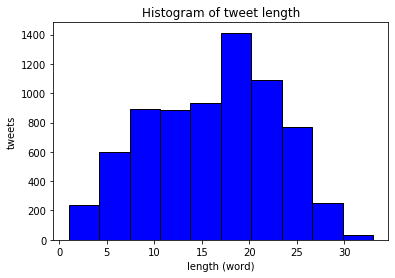

In [245]:
import matplotlib.pyplot as plt

plt.hist([len(tweet.split()) for tweet in TRAIN_DATA["Tweet"]], color = 'blue', edgecolor = 'black')
plt.title('Histogram of tweet length')
plt.xlabel('length (word)')
plt.ylabel('tweets')
plt.show()

In [322]:
MAX_LEN = 50
WORD_DIM = 100

def pad_text(words):
    if len(words) >= MAX_LEN:
        return words[: MAX_LEN]
    else:
        pad_len = MAX_LEN - len(words)
#         padding = np.zeros((pad_len, WORD_DIM))
        padding = np.zeros(pad_len)
        return np.concatenate((words, padding), axis=0)

In [286]:
def words_to_vec(words):
    return np.array([fast_model.get_word_vector(word) for word in words])

In [394]:
vocabs = set()
for tweet in TRAIN_DATA["Tweet"]:
    words = pre_process(tweet).split()
    for word in words:
        vocabs.add(word)
vocabs = list(sorted(vocabs))
voc_to_id = {v: i+1 for i, v in enumerate(vocabs)}

def words_to_id(words):
    return np.array([voc_to_id.get(word, 0) for word in words])

In [406]:
def prep(data):
    X_data = []
    y_data = []
    
    for X, y in zip(data["Tweet"], data["Label"]):
        words = pre_process(X).split()
        if len(words) > 0:
#             X_data.append(pad_text(words_to_vec(words)))
            X_data.append(pad_text(words_to_id((words))))
            y_data.append(y)
            
    return np.array(X_data).astype(np.int_), np.array(y_data).astype(np.int_)

In [407]:
X_train, y_train = prep(TRAIN_DATA)
X_dev, y_dev = prep(DEV_DATA)

In [408]:
X_train.shape

(7102, 50)

In [409]:
type(X_train[0]), type(y_train[0])

(numpy.ndarray, numpy.int64)

In [410]:
import torch
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(X_dev), torch.from_numpy(y_dev))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [461]:
class SentimentRNN(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5):
        super(SentimentRNN,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
 
        self.no_layers = no_layers
        self.vocab_size = vocab_size
    
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
    
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
              
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0, c0)
        return hidden

  

In [465]:
no_layers = 2
vocab_size = len(vocabs) + 1 #extra 1 for padding
embedding_dim = 50
output_dim = 1
hidden_dim = 256


model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5)

#moving to gpu
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(10380, 50)
  (lstm): LSTM(50, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [466]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [468]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [469]:
clip = 5
epochs = 5 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state 
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
        
        print(len(train_losses) + 1, end=' ')
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        model.zero_grad()
        output, h = model(inputs,h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output, labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
 
    
        
    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

1 :
2 :
3 :
4 :
5 :
6 :
7 :
8 :
9 :
10 :
11 :
12 :
13 :
14 :
15 :
16 :
17 :
18 :
19 :
20 :
21 :
22 :
23 :
24 :
25 :
26 :
27 :
28 :
29 :
30 :
31 :
32 :
33 :
34 :
35 :
36 :
37 :
38 :
39 :
40 :
41 :
42 :
43 :
44 :
45 :
46 :
47 :
48 :
49 :
50 :
51 :
52 :
53 :
54 :
55 :
56 :
57 :
58 :
59 :
60 :
61 :
62 :
63 :
64 :
65 :
66 :
67 :
68 :
69 :
70 :
71 :
72 :
73 :
74 :
75 :
76 :
77 :
78 :
79 :
80 :
81 :
82 :
83 :
84 :
85 :
86 :
87 :
88 :
89 :
90 :
91 :
92 :
93 :
94 :
95 :
96 :
97 :
98 :
99 :
100 :
101 :
102 :
103 :
104 :
105 :
106 :
107 :
108 :
109 :
110 :
111 :
112 :
113 :
114 :
115 :
116 :
117 :
118 :
119 :
120 :
121 :
122 :
123 :
124 :
125 :
126 :
127 :
128 :
129 :
130 :
131 :
132 :
133 :
134 :
135 :
136 :
137 :
138 :
139 :
140 :
141 :
142 :
143 :


RuntimeError: Expected hidden[0] size (2, 2, 256), got [2, 50, 256]

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

In [109]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset